# Interview Question & Answer

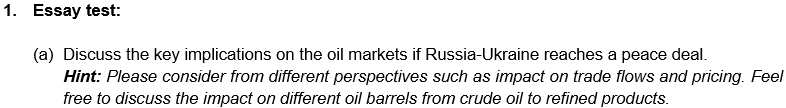

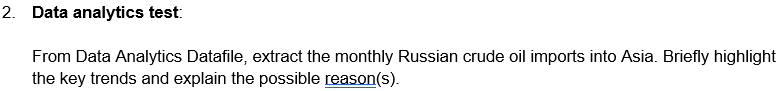

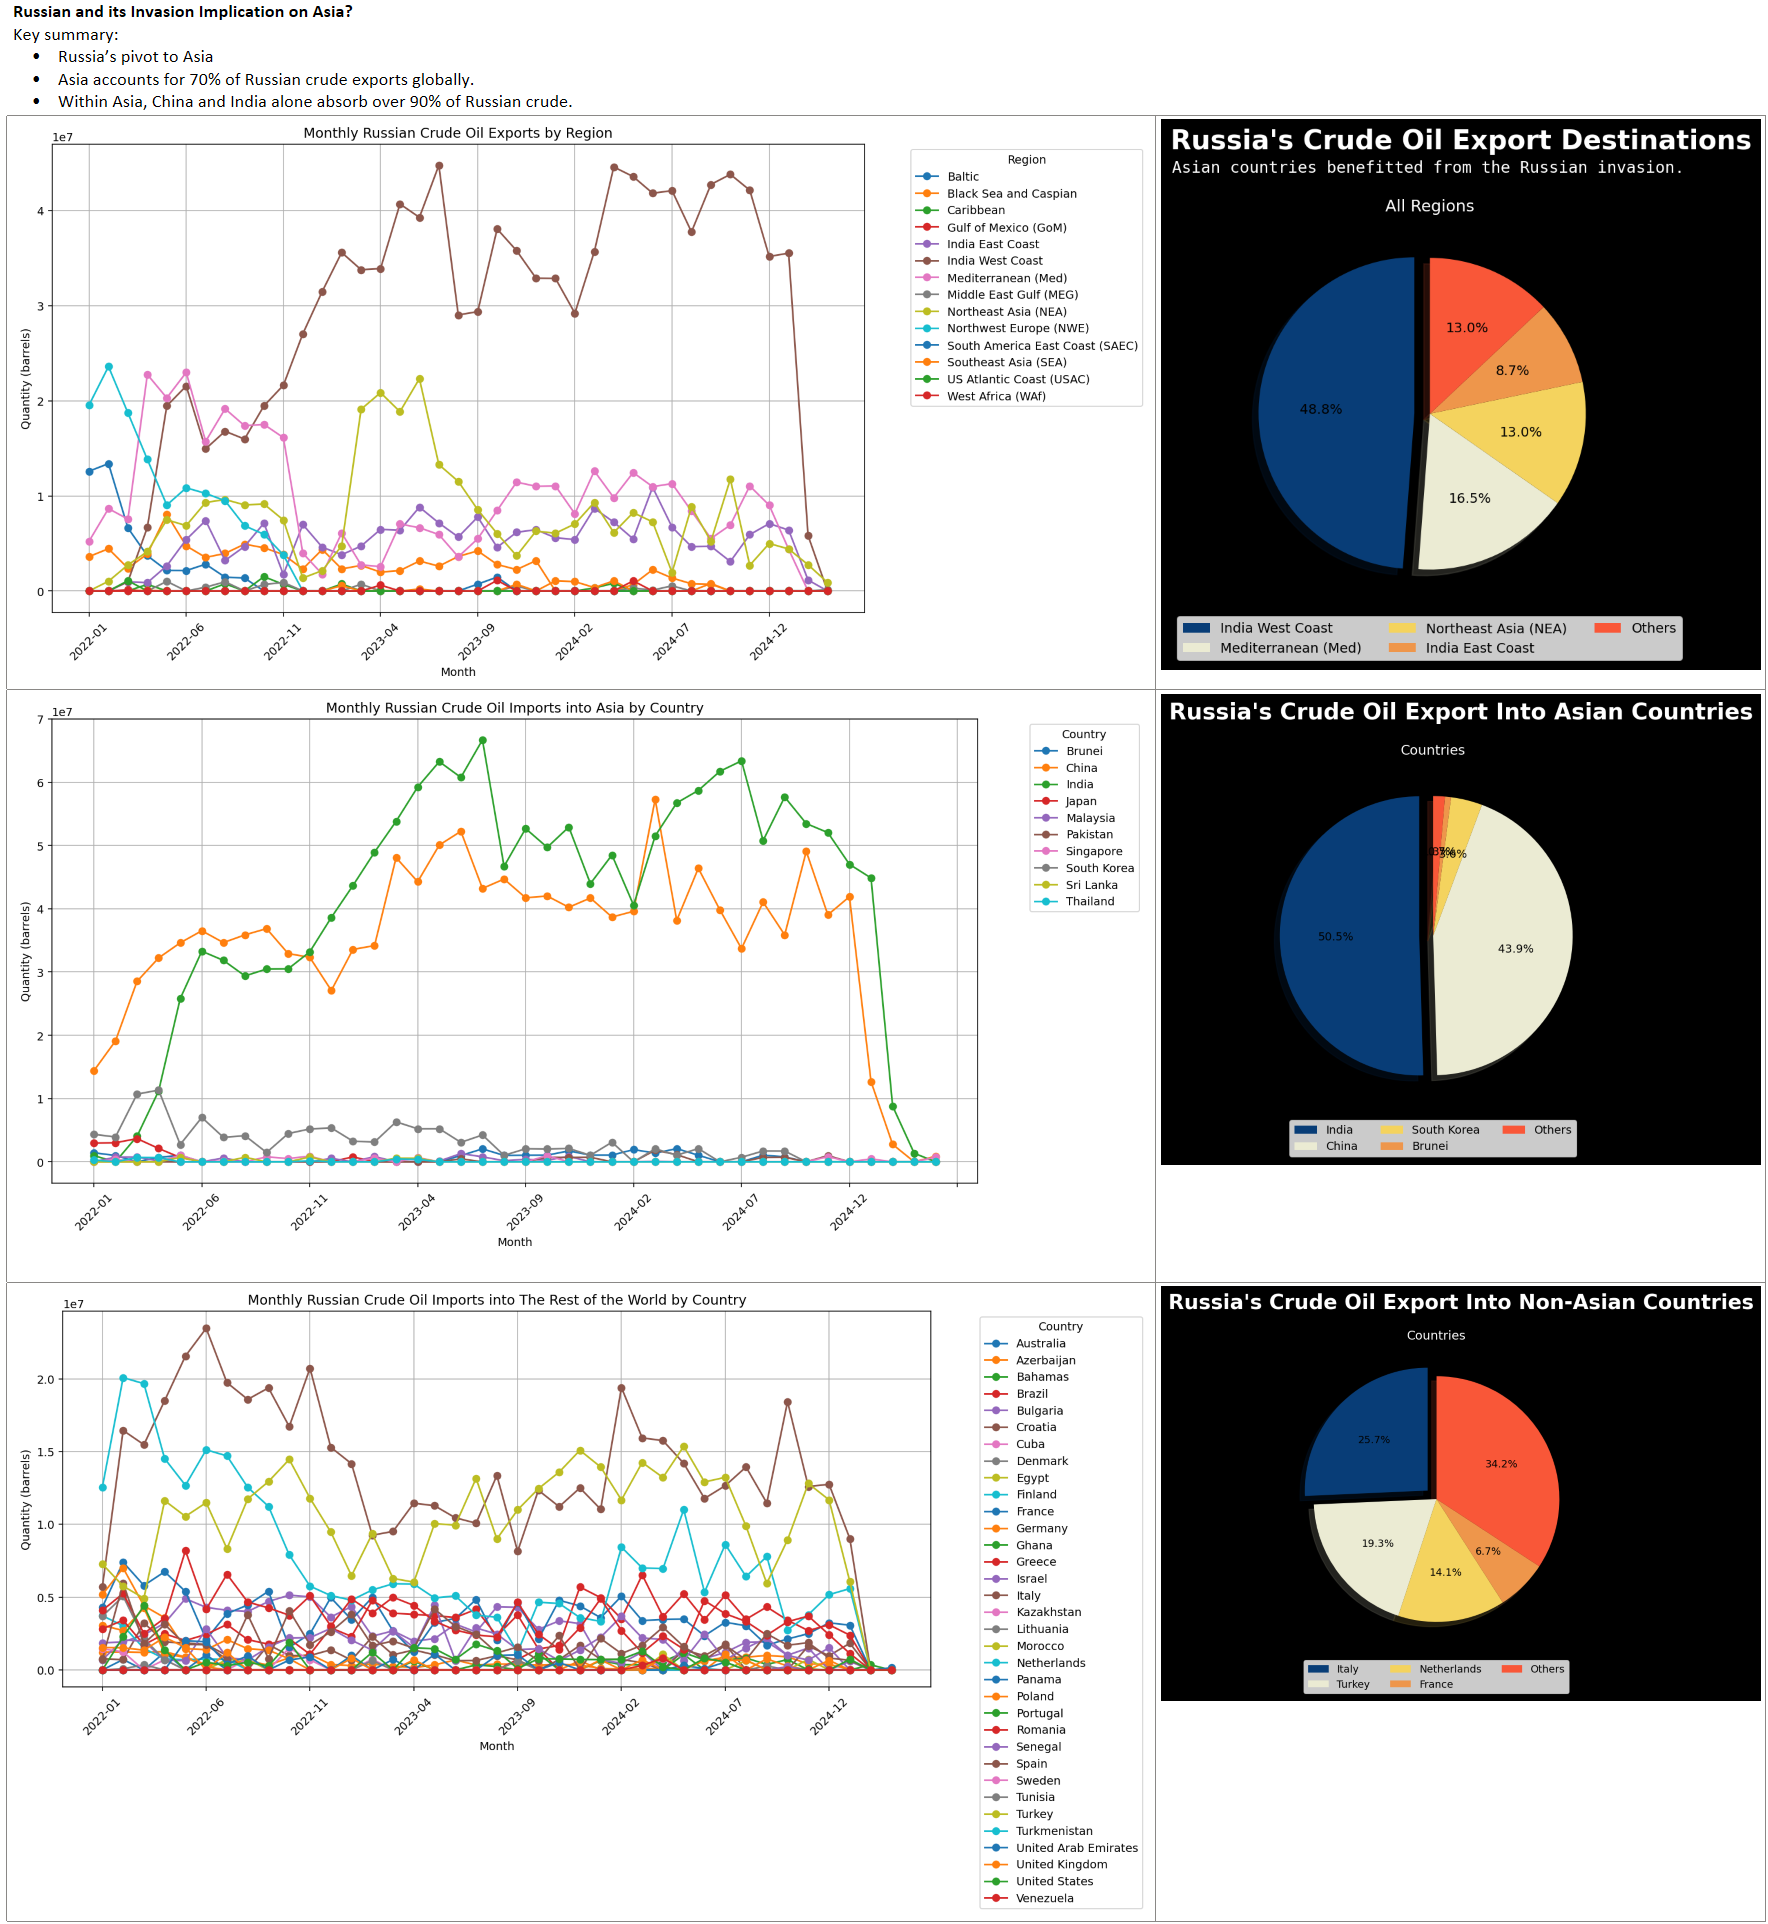

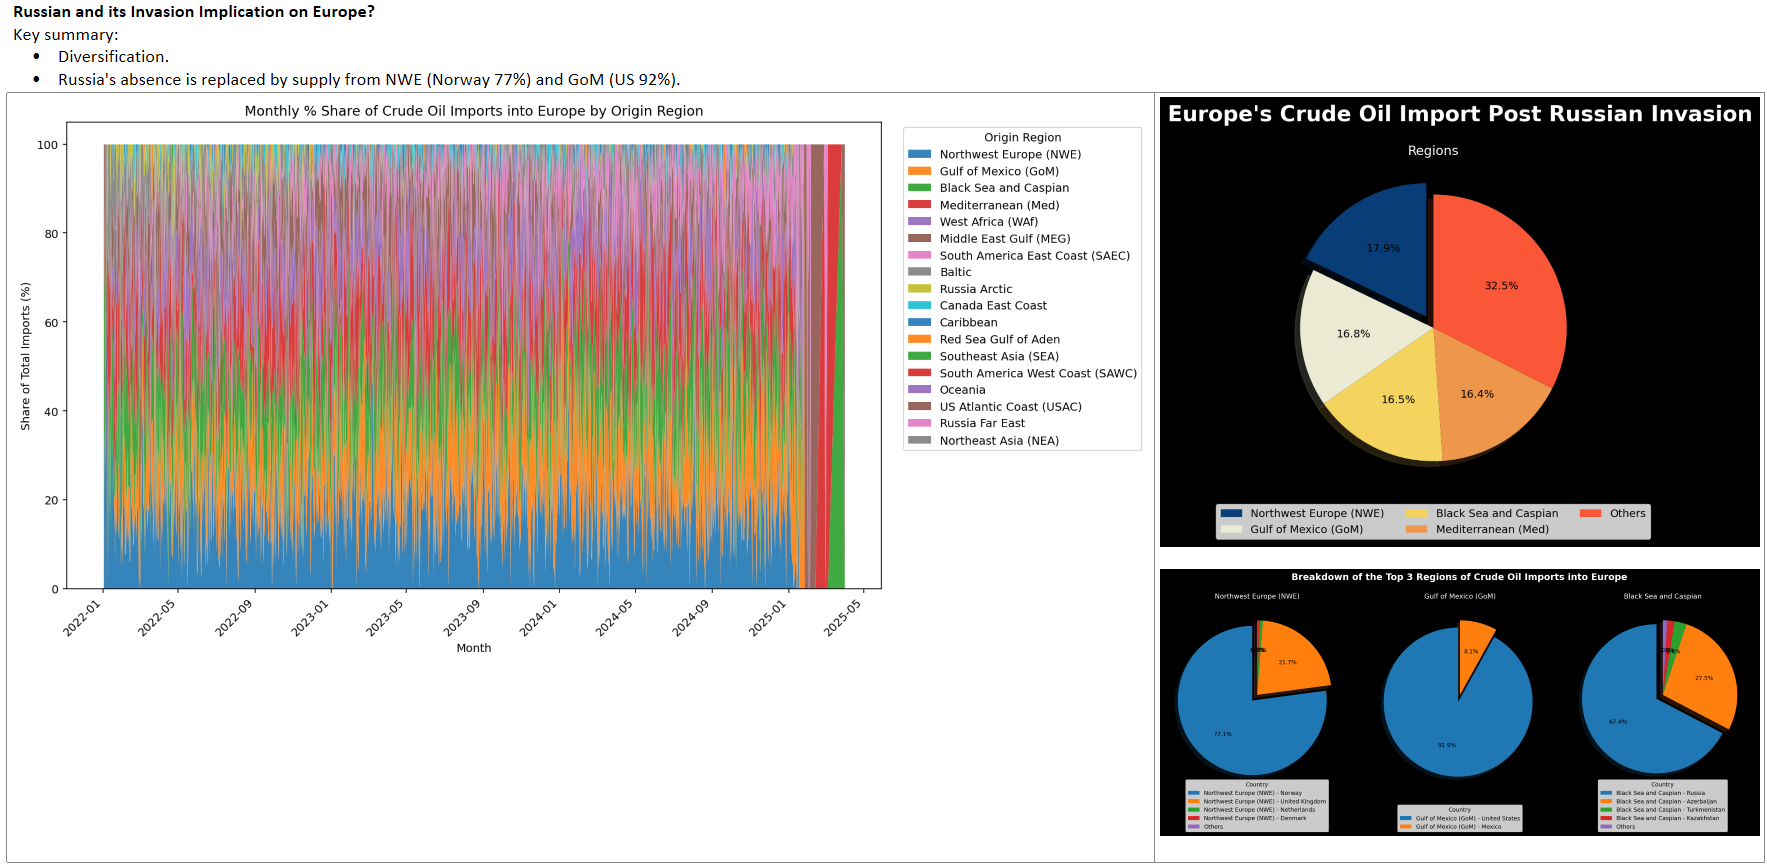

# Data Inspection/Familiarization

In [6]:
# Importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
import scipy as sp

In [7]:
# Load the uploaded Excel file to examine its structure
file_path = "../Python/Input/B. Data Analytics Test Datatile - Crude flows (Tech).xlsx"
excel_file = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
excel_file.sheet_names

# Load the data from the only sheet
df = excel_file.parse('Sheet1')

# Display dataset
display(df.iloc[:5,:10])
display(df.iloc[:5,11:20])
display(df.iloc[:5,21:])

PRIMARY VESSEL  PRIMARY IMO  PRIMARY DWT (t)  PRIMARY CAPACITY (cbm)  \
0         C.SPIRIT      9643269           313998                  353596   
1  FRONT DISCOVERY      9830109           299000                  334186   
2  AGIOS GERASIMOS      9693056           109999                  127339   
3             ABIE      9247182           302986                  343075   
4           KIRKUK      9829655           320596                  358021   

  PRIMARY CLASS VOYAGE TYPE      STATUS  CHARTERER Primary VESSEL  \
0         VLCC+      Single  Discharged        NaN            NaN   
1         VLCC+      Single  Discharged  Rongsheng            NaN   
2           LR2      Single  Discharged      Vitol            NaN   
3         VLCC+      Single  Discharged        NaN            NaN   
4         VLCC+      Single  Discharged        NaN            NaN   

   SECONDARY VESSEL IMO  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

SECONDARY CAPACITY  SECONDARY CLASS SECONDARY ROLE  \
0                  NaN             NaN            NaN   
1                  NaN             NaN            NaN   
2                  NaN             NaN            NaN   
3                  NaN             NaN            NaN   
4                  NaN             NaN            NaN   

                                     ORIGIN TERMINAL  \
0  INEOS Forties Pipeline System (Dalmeny) (Hound...   
1                         Juaymah Crude Oil Terminal   
2                        Transneft Baltic (Ust-Luga)   
3              Yanbu South Oil Terminal (Al Muajjiz)   
4                                     ADNOC Co Zadco   

                  ORIGIN PORT        ORIGIN COUNTRY   ORIGIN TRADING REGION  \
0            Hound Point [GB]        United Kingdom  Northwest Europe (NWE)   
1       Juaymah Terminal [SA]          Saudi Arabia  Middle East Gulf (MEG)   
2               Ust-Luga [RU]                Russia                  Baltic   
3  Yanbu Industrial Port [SA]          Saudi Arabia    Red Sea Gulf of Aden   
4           Zirku Island [AE]  United Arab Emirates  Middle East Gulf (MEG)   

  DEPARTURE DATE ORIGIN LOADED WEEK  
0     2022-01-01         2021-12-27  
1     2022-01-01         2021-12-27  
2     2022-01-01         2021-12-27  
3     2022-01-01         2021-12-27  
4     2022-01-01         2021-12-27

PRODUCT GROUP PRODUCT PRODUCT CATEGORY PRODUCT GRADE  QUANTITY (bbl)  \
0  Crude/Condensates   Crude       Light-Sour       Forties         2050669   
1  Crude/Condensates   Crude      Medium-Sour    Arab Heavy         1888171   
2  Crude/Condensates   Crude      Medium-Sour         Urals          729055   
3  Crude/Condensates   Crude      Medium-Sour    Arab Light         2061755   
4  Crude/Condensates   Crude      Medium-Sour   Upper Zakum          421358   

                       DESTINATION TERMINAL   DESTINATION PORT  \
0                       SK Energy SBM (2&3)  Ulsan, Onsan [KR]   
1                     ZPC Refinery Terminal      Zhoushan [CN]   
2  Hellenic Petroleum Thessaloniki Refinery  Thessaloniki [GR]   
3                   Ain Sukhna Oil Terminal    Ain Sukhna [EG]   
4                       Yantai Oil Terminal        Yantai [CN]   

  DESTINATION COUNTRY DESTINATION TRADING REGION ARRIVAL DATE  \
0         South Korea       Northeast Asia (NEA)   2022-02-27   
1               China       Northeast Asia (NEA)   2022-02-24   
2              Greece        Mediterranean (Med)   2022-01-19   
3               Egypt       Red Sea Gulf of Aden   2022-01-03   
4               China       Northeast Asia (NEA)   2022-01-30   

  DESTINATION DISCHARGED WEEK DESTINATION DISCHARGED MONTH  
0                  2022-02-21                   2022-02-01  
1                  2022-02-21                   2022-02-01  
2                  2022-01-17                   2022-01-01  
3                  2022-01-03                   2022-01-01  
4                  2022-01-24                   2022-01-01

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77219 entries, 0 to 77218
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PRIMARY VESSEL                77219 non-null  object        
 1   PRIMARY IMO                   77219 non-null  int64         
 2   PRIMARY DWT (t)               77219 non-null  int64         
 3   PRIMARY CAPACITY (cbm)        77219 non-null  int64         
 4   PRIMARY CLASS                 77219 non-null  object        
 5   VOYAGE TYPE                   77219 non-null  object        
 6   STATUS                        77219 non-null  object        
 7   CHARTERER                     37089 non-null  object        
 8   Primary VESSEL                14770 non-null  object        
 9   SECONDARY VESSEL IMO          14770 non-null  float64       
 10  SECONDARY DWT (t)             14770 non-null  float64       
 11  SECONDARY CAPACITY          

In [9]:
# display(df[["ARRIVAL DATE", "DEPARTURE DATE"]].min())
# display(df[["ARRIVAL DATE", "DEPARTURE DATE"]].max())
# print('ARRIVAL DATE:   ', df["ARRIVAL DATE"].min(), ' to ', df["ARRIVAL DATE"].max())
# print('DEPARTURE DATE: ', df["DEPARTURE DATE"].min(), ' to ', df["DEPARTURE DATE"].max())

# arrival_range   = df["ARRIVAL DATE"].max() - df["ARRIVAL DATE"].min()
# departure_range = df["DEPARTURE DATE"].max() - df["DEPARTURE DATE"].min()

# print(f"ARRIVAL DATE range:   {arrival_range.days / 365.25:.2f} years")
# print(f"DEPARTURE DATE range: {departure_range.days / 365.25:.2f} years")

# print('\nUnique PRIMARY VESSEL:',df["PRIMARY VESSEL"].nunique())
# print('Unique PRIMARY CLASS:',df["PRIMARY CLASS"].nunique())
# print('Unique VOYAGE TYPE:',df["VOYAGE TYPE"].nunique())
# print('Unique SECONDARY VESSEL IMO:',df["SECONDARY VESSEL IMO"].nunique())
# print('Unique SECONDARY CLASS:',df["SECONDARY CLASS"].nunique())
# print('Unique SECONDARY ROLE:',df["SECONDARY ROLE"].nunique())

# print('\nPRIMARY CLASS: ', df["PRIMARY CLASS"].unique())
# print('\nVOYAGE TYPE: ', df["VOYAGE TYPE"].unique())
# print('\nSECONDARY CLASS: ',df["SECONDARY CLASS"].unique())
# print('\nSECONDARY ROLE: ',df["SECONDARY ROLE"].unique())

# print('\nUnique ORIGIN PORT:',df["ORIGIN PORT"].nunique())
# print('Unique ORIGIN COUNTRY:',df["ORIGIN COUNTRY"].nunique())
# print('Unique ORIGIN TRADING REGION:',df["ORIGIN TRADING REGION"].nunique())

# print('\nUnique PRODUCT GROUP:',df["PRODUCT GROUP"].nunique())
# print('Unique PRODUCT:',df["PRODUCT"].nunique())
# print('Unique PRODUCT CATEGORY:',df["PRODUCT CATEGORY"].nunique())
# print('Unique PRODUCT GRADE:',df["PRODUCT GRADE"].nunique())

# print('\nPRODUCT GROUP: ', df["PRODUCT GROUP"].unique())
# print('\nPRODUCT: ', df["PRODUCT"].unique())
# print('\nPRODUCT CATEGORY: ', df["PRODUCT CATEGORY"].unique())

# print('\nUnique DESTINATION PORT:',df["DESTINATION PORT"].nunique())
# print('Unique DESTINATION COUNTRY:',df["DESTINATION COUNTRY"].nunique())
# print('Unique DESTINATION TRADING REGION:',df["DESTINATION TRADING REGION"].nunique())

# Exploratory Data Analysis

## Chosen Color Pallete

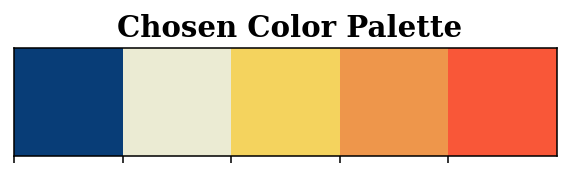

In [12]:
# Palette
col    = ['#083d77', '#ebebd3', '#f4d35e','#ee964b','#f95738']
background_color = "#fafafa"
sns.palplot(col)

# Plot
plt.title("Chosen Color Palette ",loc='left',fontfamily='serif',fontsize=15,y=1,x=0.19,fontweight='bold')
plt.show()

## Importer / Exporter

### Worldwide - Who's the Importer or the Exporter?

In [15]:
import geopandas
import pycountry

#source: 
# https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
# https://naturaldisasters.ai/posts/python-geopandas-world-map-tutorial/
# https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
# https://unstats.un.org/unsd/methodology/m49/

# load the shapefile 
path          = "../Python/Input/ne_110m_admin_0_sovereignty/"
world         = geopandas.read_file(path+'ne_110m_admin_0_sovereignty.shp')
world         = world[['CONTINENT', 'NAME', 'ISO_A3', 'geometry']]
world.rename(columns={"ISO_A3": "CODE"}, inplace=True)

# shapefile file contained wrongly assigned CODE, manual fix needed
#          CONTINENT                      NAME CODE  \
# 4    North America  United States of America  -99   
# 20          Europe            United Kingdom  -99   
# 21          Europe                    Norway  -99   
# 22          Europe                   Denmark  -99   
# 23          Europe                    France  -99   
# 74            Asia                    Israel  -99   
# 127         Europe               Netherlands  -99   
# 132        Oceania               New Zealand  -99   
# 133        Oceania                 Australia  -99   
# 135           Asia                     China  -99   
# 140           Asia                   Georgia  -99   
# 145         Europe                   Finland  -99   
# 154           Asia                 N. Cyprus  -99   
# 161         Africa                Somaliland  -99   
# 168         Europe                    Kosovo  -99 

# Fix wrongly assigned CODE
country_code = {'United States of America':'USA',
                'United Kingdom':'GBR',
                'Norway':'NOR',
                'Denmark':'DNK',
                'France':'FRA',
                'Israel':'ISR',
                'Netherlands':'NLD',
                'New Zealand':'NZL',
                'Australia':'AUS',
                'China':'CHN',
                'Georgia':'GEO',
                'Finland':'FIN',}

for country_, code_ in country_code.items():
    world.loc[world.NAME==country_, 'CODE'] = code_

# display(world)

In [16]:
# data prep
exporter = pd.DataFrame(data={'Country': df["ORIGIN COUNTRY"].unique()})
importer = pd.DataFrame(data={'Country': df["DESTINATION COUNTRY"].unique()})

# assign country code
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# create a column for code 
importer['CODE']=alpha3code(importer['Country'])
exporter['CODE']=alpha3code(exporter['Country'])

# Fix missing CODE
country_code = {'Russia':'RUS',
                'Iran':'IRN',
                'Republic of the Congo':'COG',
                'Venezuela':'VEN',
                'Brunei':'BRN',
                'South Korea':'KOR',
                'Vietnam':'VNM',
                'Saint Lucia':'LCA',
                'Ivory Coast':'CIV',
                'Democratic Republic of the Congo':'COD',
                'East Timor':'TLS',
                'Bahrain':'BHR',
                'Turkey':'TUR',
                'US Virgin Islands':'VIR',
                'Curacao':'CUW'}

for country_, code_ in country_code.items():
    exporter.loc[exporter.Country==country_, 'CODE'] = code_

# Fix missing CODE
country_code = {"Taiwan":"TWN",
                "Syria":"SYR"}

for country_, code_ in country_code.items():
    importer.loc[importer.Country==country_, 'CODE'] = code_
    
# merge datasets
merge_importer=pd.merge(world,importer,on='CODE')
merge_exporter=pd.merge(world,exporter,on='CODE')

# identify missing country code
# print(importer[~importer["Country"].isin(merge_importer["Country"])])
# print(exporter[~exporter["Country"].isin(merge_exporter["Country"])])

# display datasets
# print('\n--------------IMPORTER--------------')
# display(importer)
# display(merge_importer)

# print('\n--------------EXPORTER--------------')
# display(exporter)
# display(merge_exporter)

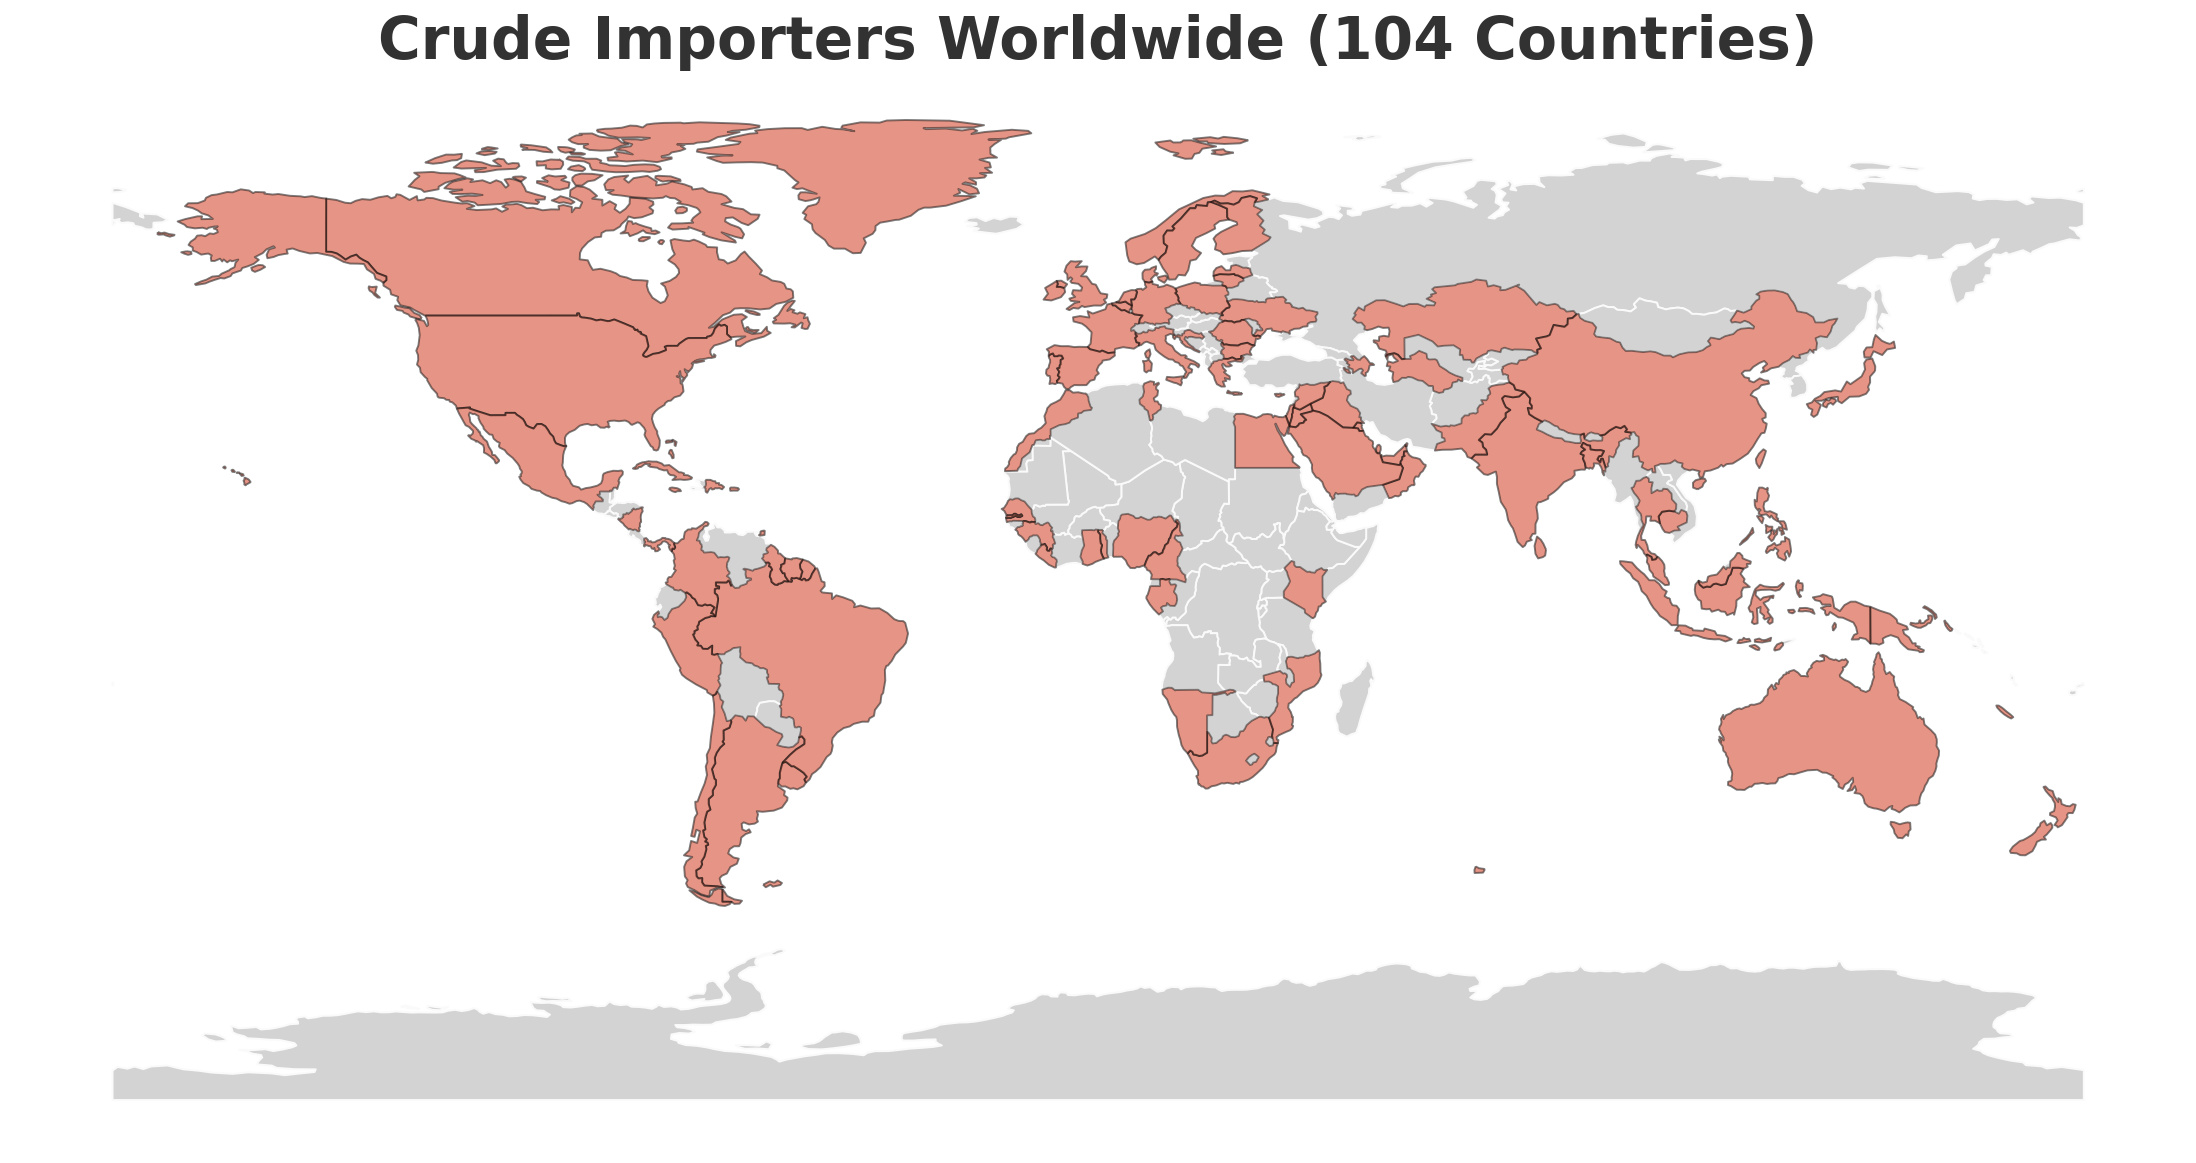

In [17]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax  = fig.add_subplot()

# grab relevant countries
data = world[world["CODE"].isin(merge_importer["CODE"])]

# base
world.plot(ax=ax, edgecolor=background_color, color='lightgray')

# actual
data.plot(ax=ax, color=col[-1], edgecolor="black", alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_facecolor(background_color)

# set the plot title
plt.title(f"Crude Importers Worldwide ({df["DESTINATION COUNTRY"].nunique()} Countries)", fontdict={'fontsize': 30,'fontweight': 'bold','fontfamily': 'sans-serif','color': '#323232'})

plt.show()

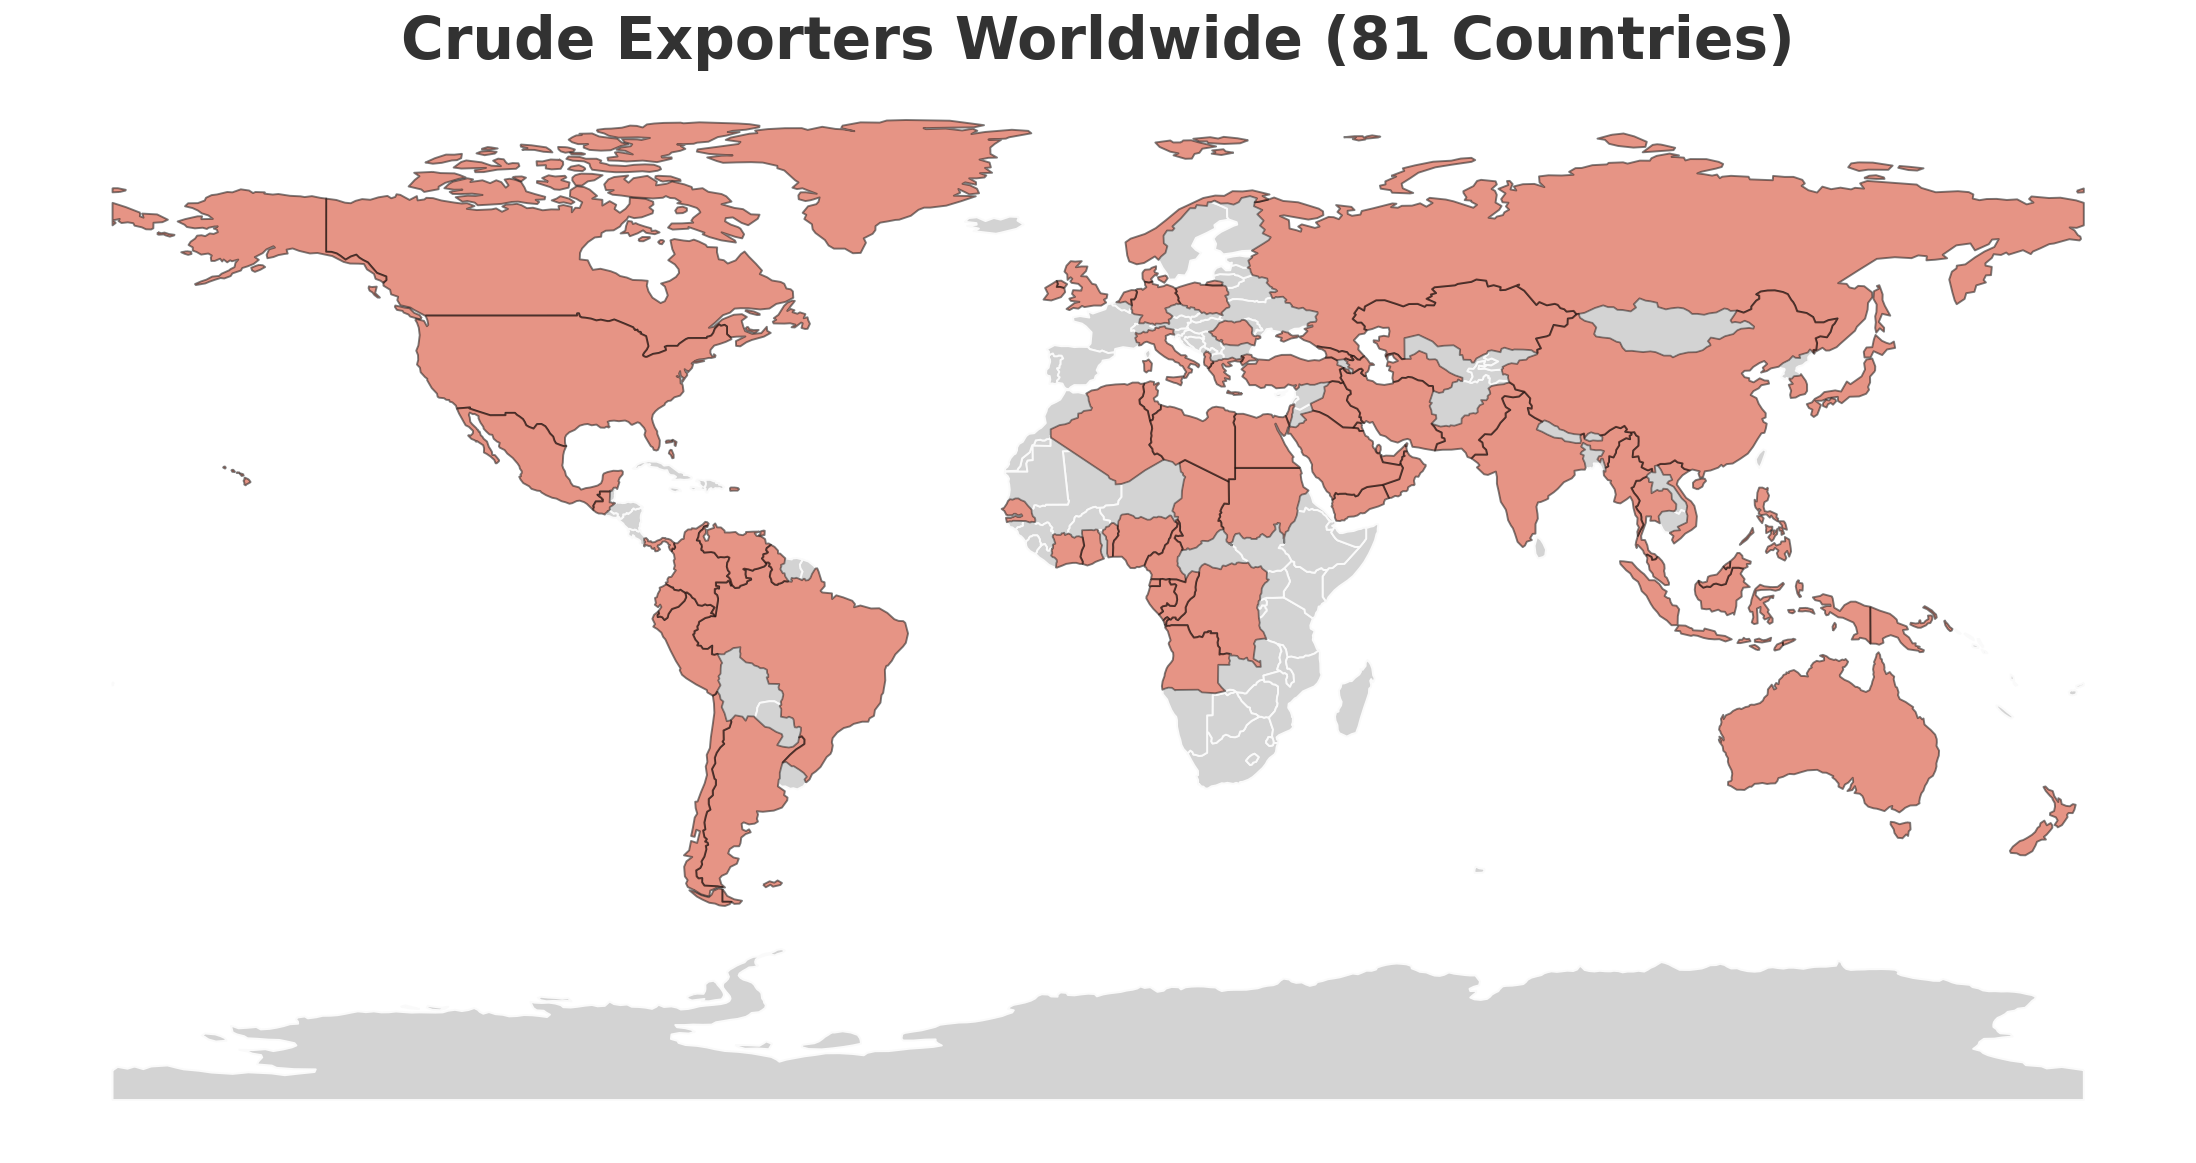

In [18]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax  = fig.add_subplot()

# grab relevant countries
data = world[world["CODE"].isin(merge_exporter["CODE"])]

# base
world.plot(ax=ax, edgecolor=background_color, color='lightgray')

# actual
data.plot(ax=ax, color=col[-1], edgecolor="black", alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_facecolor(background_color)

# set the plot title
plt.title(f"Crude Exporters Worldwide ({df["ORIGIN COUNTRY"].nunique()} Countries)", fontdict={'fontsize': 30,'fontweight': 'bold','fontfamily': 'sans-serif','color': '#323232'})

plt.show()

### Worldwide - Which Country Export/Import the Most?

In [20]:
# Find the biggest importer and exporter
exporter    = (df.groupby("ORIGIN COUNTRY")
               ["QUANTITY (bbl)"].sum().reset_index()
               .sort_values(by=["QUANTITY (bbl)"], ascending=False).reset_index()
               .drop(labels='index', axis=1)
               .head(5))
exporter.rename(columns={"ORIGIN COUNTRY": "ORIGIN", "QUANTITY (bbl)": "QUANTITY"}, inplace=True)

importer    = (df.groupby("DESTINATION COUNTRY")
               ["QUANTITY (bbl)"].sum().reset_index()
               .sort_values(by=["QUANTITY (bbl)"], ascending=False).reset_index()
               .drop(labels='index', axis=1)
               .head(5))
importer.rename(columns={"DESTINATION COUNTRY": "DESTINATION", "QUANTITY (bbl)": "QUANTITY"}, inplace=True)
importer    = importer[importer["DESTINATION"] != "United States"].reset_index(drop=True)

# Add country code
country_code = {'Saudi Arabia':'SAU',
                'Russia':'RUS',
                'United States':'USA',
                'Iraq':'IRQ',
                'United Arab Emirates':'ARE',
                'China':'CHN',
                'India':'IND',
                'South Korea':'KOR',
                'Japan':'JPN'}

for country_, code_ in country_code.items():
    exporter.loc[exporter.ORIGIN==country_, 'CODE']      = code_
    importer.loc[importer.DESTINATION==country_, 'CODE'] = code_


# print(f"Total exported volume by top 5 countries: {exporter["QUANTITY"].sum():,}")
# display(exporter)

# print(f"Total imported volume by top 5 countries: {importer["QUANTITY"].sum():,}")
# print('Note: USA is 3rd largest importer and exporter. Purposely drop USA as importer for clean visualization')
# display(importer)

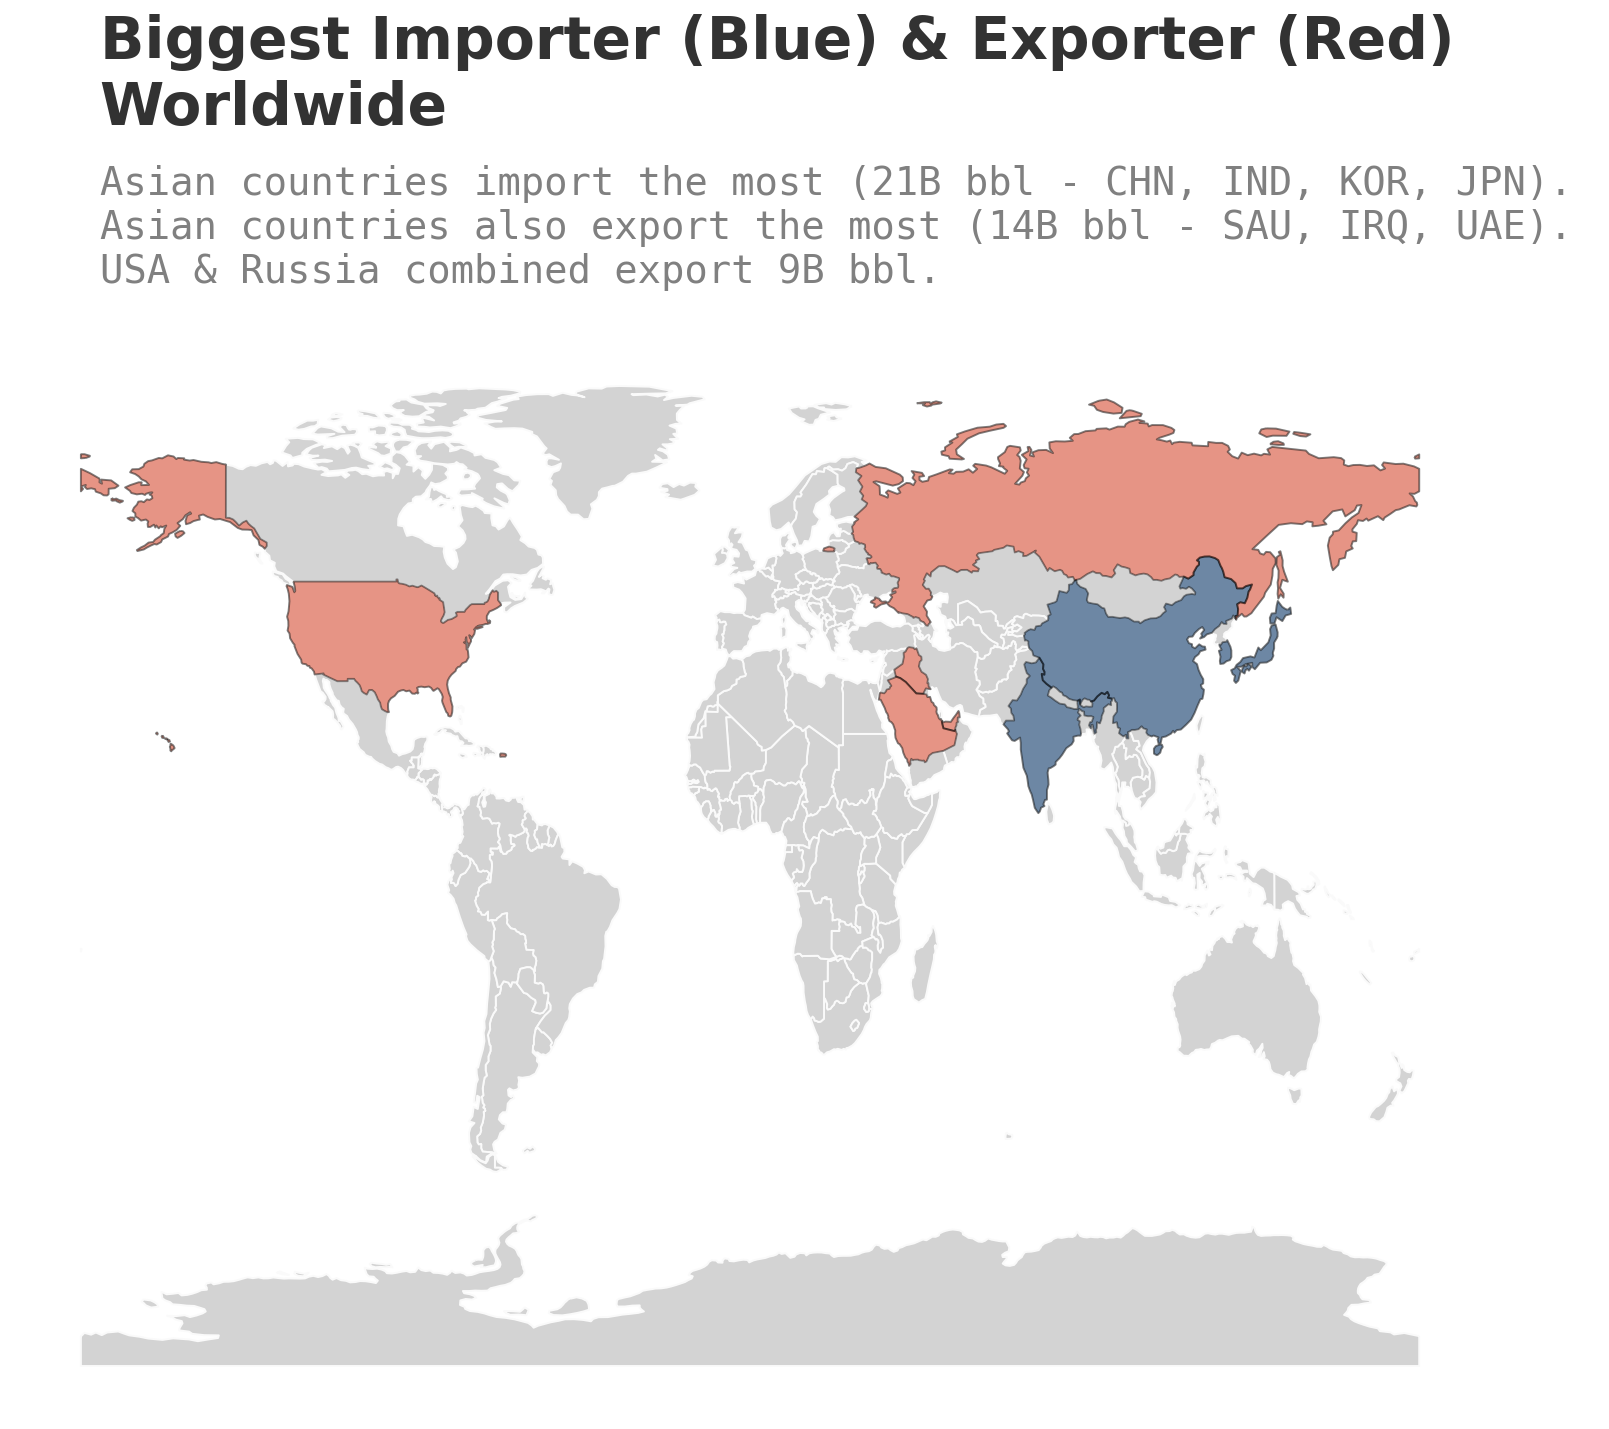

In [21]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax  = fig.add_subplot()

# grab relevant countries
imp = world[world["CODE"].isin(importer["CODE"])]
exp = world[world["CODE"].isin(exporter["CODE"])]

# base
world.plot(ax=ax, edgecolor=background_color, color='lightgray')

# actual
imp.plot(ax=ax, color=col[0],  edgecolor="black", alpha=0.5)
exp.plot(ax=ax, color=col[-1], edgecolor="black", alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_facecolor(background_color)

# set the plot title
ax.text(-175,130,"Biggest Importer (Blue) & Exporter (Red) \nWorldwide",fontsize=30,fontweight='bold',fontfamily='sans-serif',color='#323232')
ax.text(-175,102,"Asian countries import the most (21B bbl - CHN, IND, KOR, JPN). \nAsian countries also export the most (14B bbl - SAU, IRQ, UAE). \nUSA & Russia combined export 9B bbl.",color='gray',fontfamily='monospace',fontsize=20)

plt.show()

### Worldwide - For Top 3 Exporters, Who's Their Biggest Clients?

In [23]:
# # Filter for top 3 exporter globally
# df_SAU = df[df["ORIGIN COUNTRY"] == "Saudi Arabia"].copy()
# df_RUS = df[df["ORIGIN COUNTRY"] == "Russia"].copy()
# df_USA = df[df["ORIGIN COUNTRY"] == "United States"].copy()
# df_SAU["Month"] = df_SAU["ARRIVAL DATE"].dt.to_period("M").astype(str)
# df_RUS["Month"] = df_RUS["ARRIVAL DATE"].dt.to_period("M").astype(str)
# df_USA["Month"] = df_USA["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_SAU = df_SAU.groupby(["Month", "DESTINATION TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()
# df_RUS = df_RUS.groupby(["Month", "DESTINATION TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()
# df_USA = df_USA.groupby(["Month", "DESTINATION TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_SAU = df_SAU.pivot(index="Month", columns="DESTINATION TRADING REGION", values="QUANTITY (bbl)").fillna(0)
# pivot_RUS = df_RUS.pivot(index="Month", columns="DESTINATION TRADING REGION", values="QUANTITY (bbl)").fillna(0)
# pivot_USA = df_USA.pivot(index="Month", columns="DESTINATION TRADING REGION", values="QUANTITY (bbl)").fillna(0)

# # display(df_SAU)
# # display(pivot_RUS)
# # display(pivot_SAU)

In [24]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_SAU, "#1 Exporter Worldwide (Saudi Arabia)"),
#                (pivot_RUS, "#2 Exporter Worldwide (Russia)"),
#                (pivot_USA, "#3 Exporter Worldwide (USA)")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}: Monthly Crude Oil Exports by Region", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

### Worldwide - For Top 3 Importers - Where Do Their Products Came From?

In [26]:
# # Filter for top 3 importer globally
# df_CHN  = df[df["DESTINATION COUNTRY"] == "China"].copy()
# df_IND  = df[df["DESTINATION COUNTRY"] == "India"].copy()
# df_USA2 = df[df["DESTINATION COUNTRY"] == "United States"].copy()
# df_CHN["Month"]  = df_CHN["ARRIVAL DATE"].dt.to_period("M").astype(str)
# df_IND["Month"]  = df_IND["ARRIVAL DATE"].dt.to_period("M").astype(str)
# df_USA2["Month"] = df_USA2["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_CHN  = df_CHN.groupby(["Month", "ORIGIN TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()
# df_IND  = df_IND.groupby(["Month", "ORIGIN TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()
# df_USA2 = df_USA2.groupby(["Month", "ORIGIN TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_CHN  = df_CHN.pivot(index="Month", columns="ORIGIN TRADING REGION", values="QUANTITY (bbl)").fillna(0)
# pivot_IND  = df_IND.pivot(index="Month", columns="ORIGIN TRADING REGION", values="QUANTITY (bbl)").fillna(0)
# pivot_USA2 = df_USA2.pivot(index="Month", columns="ORIGIN TRADING REGION", values="QUANTITY (bbl)").fillna(0)

# # display(df_CHN)
# # display(pivot_IND)

In [27]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_CHN,  "#1 Importer Worldwide (China)"),
#                (pivot_IND,  "#2 Importer Worldwide (India)"),
#                (pivot_USA2, "#3 Importer Worldwide (USA)")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}: Monthly Crude Oil Exports by Region", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [28]:
# df_tmp = df[df["ORIGIN TRADING REGION"] == "Middle East Gulf (MEG)"].copy()
# print("Middle East Gulf (MEG) Countries: ", df_tmp["ORIGIN COUNTRY"].unique())

# df_tmp = df[df["ORIGIN TRADING REGION"] == "Red Sea Gulf of Aden"].copy()
# print("Red Sea Gulf of Aden Countries: ", df_tmp["ORIGIN COUNTRY"].unique())

# df_tmp = df[df["ORIGIN TRADING REGION"] == "India East Coast"].copy()
# print("\nIndia East Coast Countries: ", df_tmp["ORIGIN COUNTRY"].unique())

# df_tmp = df[df["ORIGIN TRADING REGION"] == "India West Coast"].copy()
# print("India West Coast Countries: ", df_tmp["ORIGIN COUNTRY"].unique())

# df_tmp = df[df["ORIGIN COUNTRY"] == "Russia"].copy()
# print("\nRussia Continents: ", df_tmp["ORIGIN TRADING REGION"].unique())

# df_tmp = df[df["ORIGIN COUNTRY"] == "Malaysia"].copy()
# print("\nMalaysia Export To: ", df_tmp["DESTINATION COUNTRY"].unique())

# df_tmp = df[df["DESTINATION COUNTRY"] == "Malaysia"].copy()
# print("Malaysia Import From: ", df_tmp["ORIGIN COUNTRY"].unique())

# # display(df_tmp)

### Malaysia - Who's our Business Partners?

In [30]:
# Find the Malaysia's business partners
exporter    = (df[df["ORIGIN COUNTRY"] == "Malaysia"].copy()
               .groupby("DESTINATION COUNTRY")["QUANTITY (bbl)"].sum().reset_index()
               .sort_values(by=["QUANTITY (bbl)"], ascending=False).reset_index()
               .drop(labels='index', axis=1))
exporter.rename(columns={"DESTINATION COUNTRY": "Country", "QUANTITY (bbl)": "QUANTITY"}, inplace=True)

importer    = (df[df["DESTINATION COUNTRY"] == "Malaysia"].copy()
               .groupby("ORIGIN COUNTRY")["QUANTITY (bbl)"].sum().reset_index()
               .sort_values(by=["QUANTITY (bbl)"], ascending=False).reset_index()
               .drop(labels='index', axis=1))
importer.rename(columns={"ORIGIN COUNTRY": "Country", "QUANTITY (bbl)": "QUANTITY"}, inplace=True)

# create a column for code 
importer['CODE']=alpha3code(importer['Country'])
exporter['CODE']=alpha3code(exporter['Country'])

# Fix missing CODE
country_code = {'Russia':'RUS',
                'Iran':'IRN',
                'Republic of the Congo':'COG',
                'Venezuela':'VEN',
                'Brunei':'BRN',
                'South Korea':'KOR',
                'Vietnam':'VNM',
                'Saint Lucia':'LCA',
                'Ivory Coast':'CIV',
                'Democratic Republic of the Congo':'COD',
                'Republic of the Congo':'COG',
                'East Timor':'TLS',
                'Bahrain':'BHR',
                'Turkey':'TUR',
                'Taiwan':'TWN',
                'US Virgin Islands':'VIR',
                'Curacao':'CUW'}

for country_, code_ in country_code.items():
    exporter.loc[exporter.Country==country_, 'CODE'] = code_
    importer.loc[importer.Country==country_, 'CODE'] = code_

# print(f"Total exported volume: {exporter["QUANTITY"].sum():,}")
# display(exporter)

# print(f"Total imported volume: {importer["QUANTITY"].sum():,}")
# display(importer)

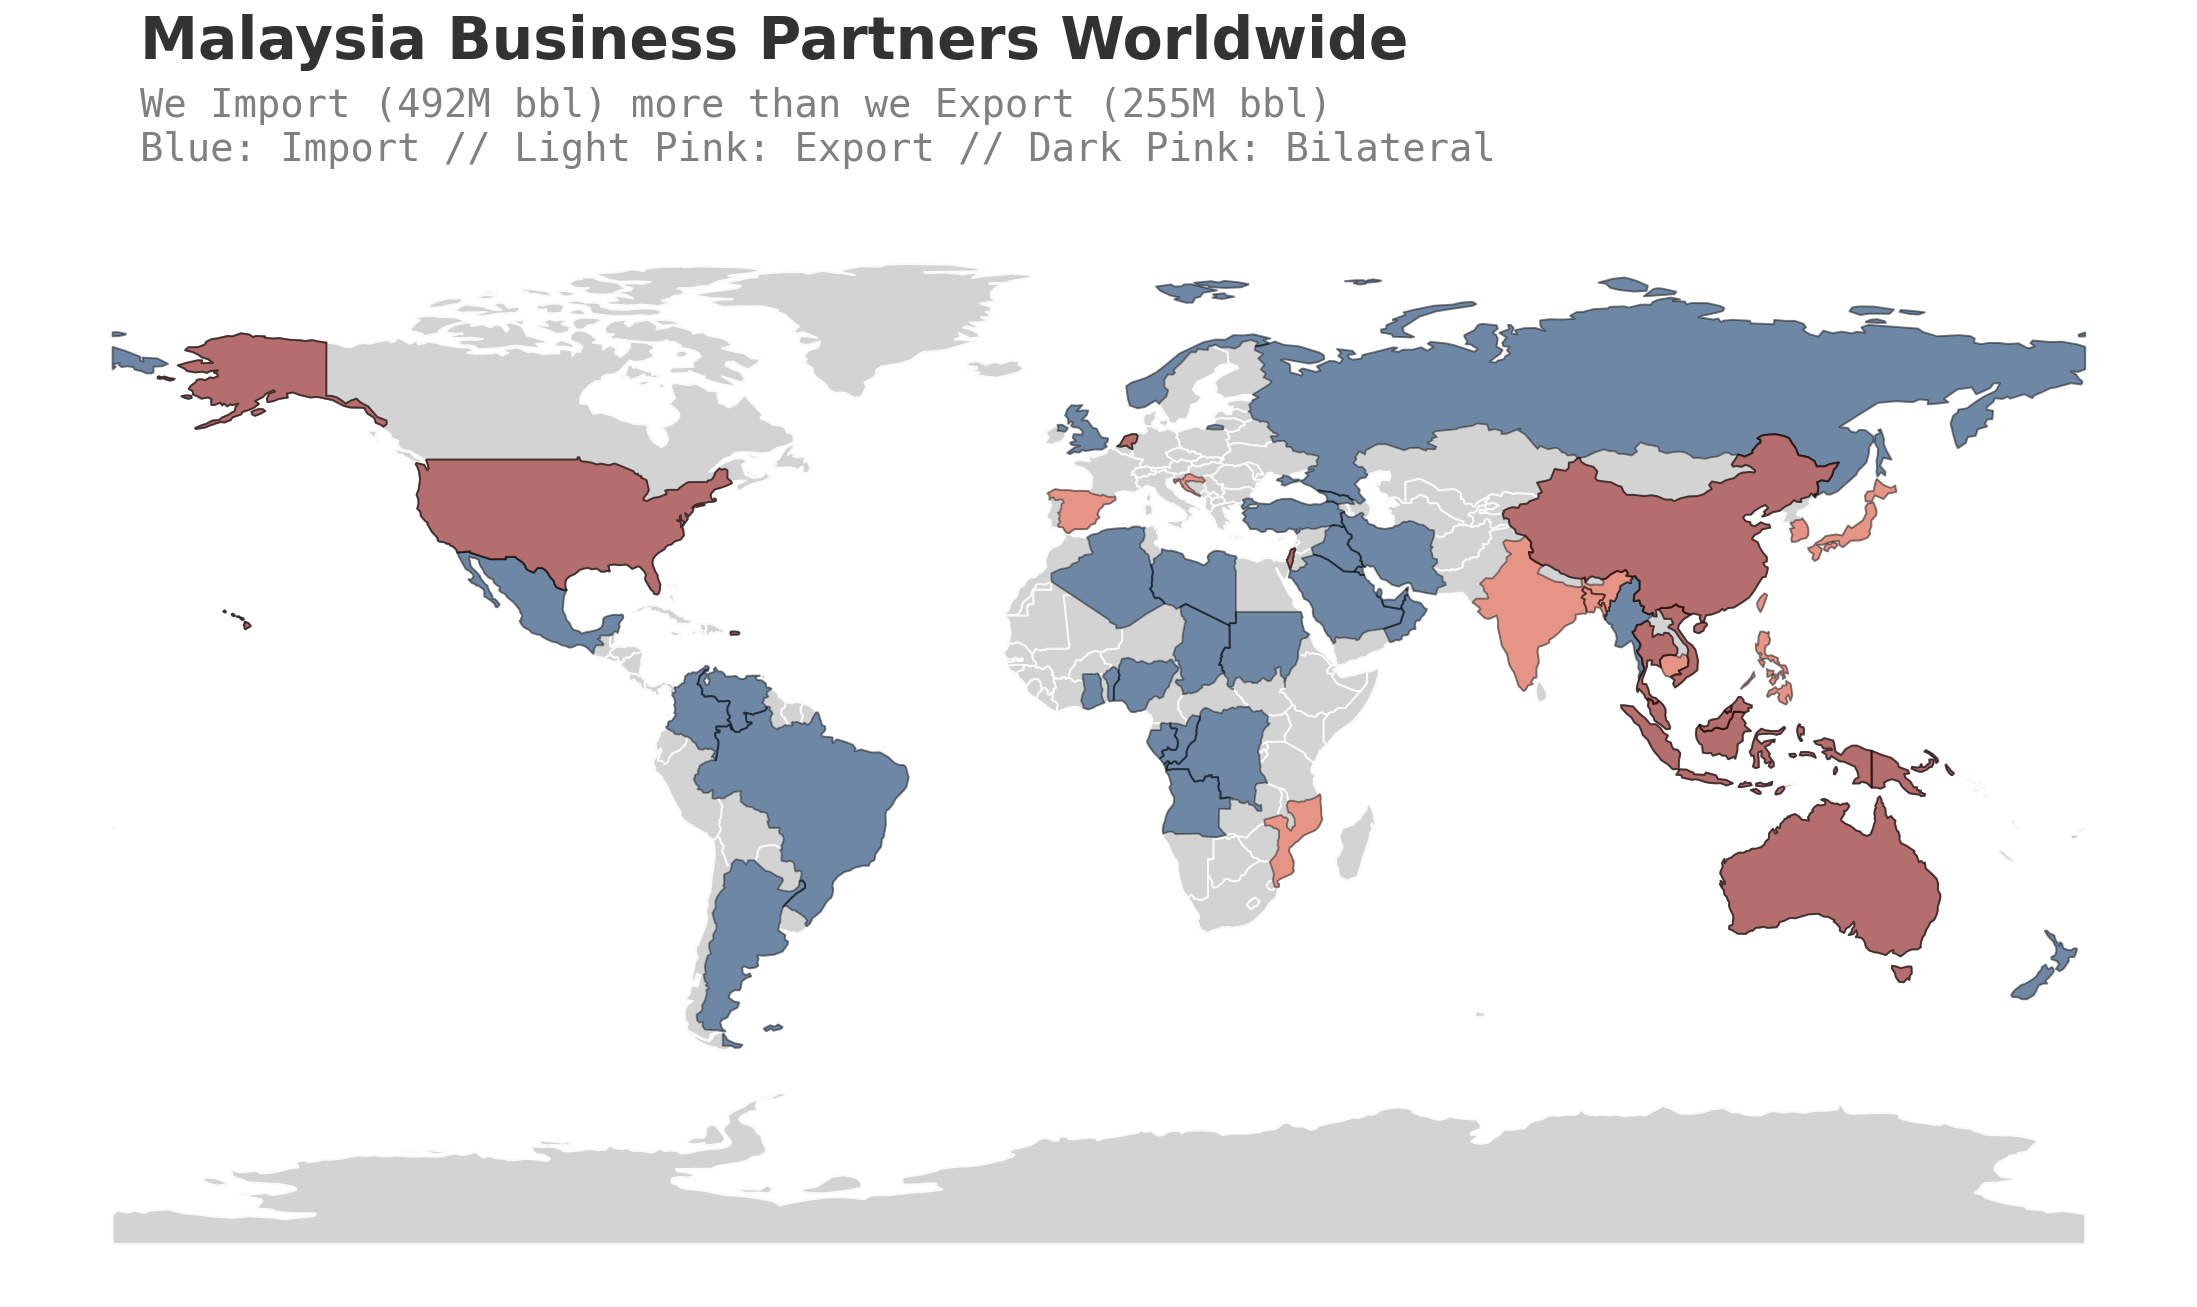

In [31]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax  = fig.add_subplot()

# grab relevant countries
imp = world[world["CODE"].isin(importer["CODE"])]
exp = world[world["CODE"].isin(exporter["CODE"])]

# base
world.plot(ax=ax, edgecolor=background_color, color='lightgray')

# actual
imp.plot(ax=ax, color=col[0],  edgecolor="black", alpha=0.5)
exp.plot(ax=ax, color=col[-1], edgecolor="black", alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_facecolor(background_color)

# set the plot title
ax.text(-175,120,"Malaysia Business Partners Worldwide",fontsize=30,fontweight='bold',fontfamily='sans-serif',color='#323232')
ax.text(-175,102,"We Import (492M bbl) more than we Export (255M bbl) \nBlue: Import // Light Pink: Export // Dark Pink: Bilateral",color='gray',fontfamily='monospace',fontsize=20)

plt.show()

### Saudi - Their Business?

In [33]:
# # Filter for malaysia business partners
# df_exp  = df[df["ORIGIN COUNTRY"] == "Saudi Arabia"].copy()
# # df_imp  = df[df["DESTINATION COUNTRY"] == "Saudi Arabia"].copy()

# df_exp["Month"]  = df_exp["ARRIVAL DATE"].dt.to_period("M").astype(str)
# # df_imp["Month"]  = df_imp["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and trading country
# df_exp  = df_exp.groupby(["Month", "DESTINATION COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()
# # df_imp  = df_imp.groupby(["Month", "ORIGIN COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_exp  = df_exp.pivot(index="Month", columns="DESTINATION COUNTRY", values="QUANTITY (bbl)").fillna(0)
# # pivot_imp  = df_imp.pivot(index="Month", columns="ORIGIN COUNTRY", values="QUANTITY (bbl)").fillna(0)

# # display(df_imp)
# # display(pivot_exp)

In [34]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_exp,  "Saudi Arabia's Export")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}: Monthly Crude Oil by Country", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [35]:
# # Filter for malaysia business partners
# df_exp  = df[df["ORIGIN COUNTRY"] == "Saudi Arabia"].copy()
# df_exp["Month"]  = df_exp["ARRIVAL DATE"].dt.to_period("M").astype(str)
# # Group by month and trading country
# df_exp  = df_exp.groupby(["Month", "DESTINATION COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_exp  = df_exp.pivot(index="Month", columns="DESTINATION COUNTRY", values="QUANTITY (bbl)").fillna(0)

# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_exp,  "Saudi Arabia's Export")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}: Monthly Crude Oil by Country", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

### Malaysia - How our Import/Export Business Doing?

In [37]:
# # Filter for top 3 exporter globally
# df_MYS = df[df["ORIGIN COUNTRY"] == "Malaysia"].copy()
# df_MYS["Month"] = df_MYS["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_MYS = df_MYS.groupby(["Month", "DESTINATION TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_MYS = df_MYS.pivot(index="Month", columns="DESTINATION TRADING REGION", values="QUANTITY (bbl)").fillna(0)

# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_MYS, "Malaysia")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}: Monthly Crude Oil Exports by Region", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [38]:
# # Filter for top 3 exporter globally
# df_MYS = df[df["DESTINATION COUNTRY"] == "Malaysia"].copy()
# df_MYS["Month"] = df_MYS["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_MYS = df_MYS.groupby(["Month", "ORIGIN TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_MYS = df_MYS.pivot(index="Month", columns="ORIGIN TRADING REGION", values="QUANTITY (bbl)").fillna(0)

# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_MYS, "Malaysia")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}: Monthly Crude Oil Imports by Region", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [39]:
# # Filter for malaysia business partners
# df_exp  = df[df["ORIGIN COUNTRY"] == "Malaysia"].copy()
# df_imp  = df[df["DESTINATION COUNTRY"] == "Malaysia"].copy()

# df_exp["Month"]  = df_exp["ARRIVAL DATE"].dt.to_period("M").astype(str)
# df_imp["Month"]  = df_imp["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and trading country
# df_exp  = df_exp.groupby(["Month", "DESTINATION COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()
# df_imp  = df_imp.groupby(["Month", "ORIGIN COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_exp  = df_exp.pivot(index="Month", columns="DESTINATION COUNTRY", values="QUANTITY (bbl)").fillna(0)
# pivot_imp  = df_imp.pivot(index="Month", columns="ORIGIN COUNTRY", values="QUANTITY (bbl)").fillna(0)

# # display(df_exp)
# # display(pivot_exp)

In [40]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_exp,  "Malaysia's Export"),
#                (pivot_imp,  "Malaysia's Import")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}: Monthly Crude Oil by Country", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

### Summary

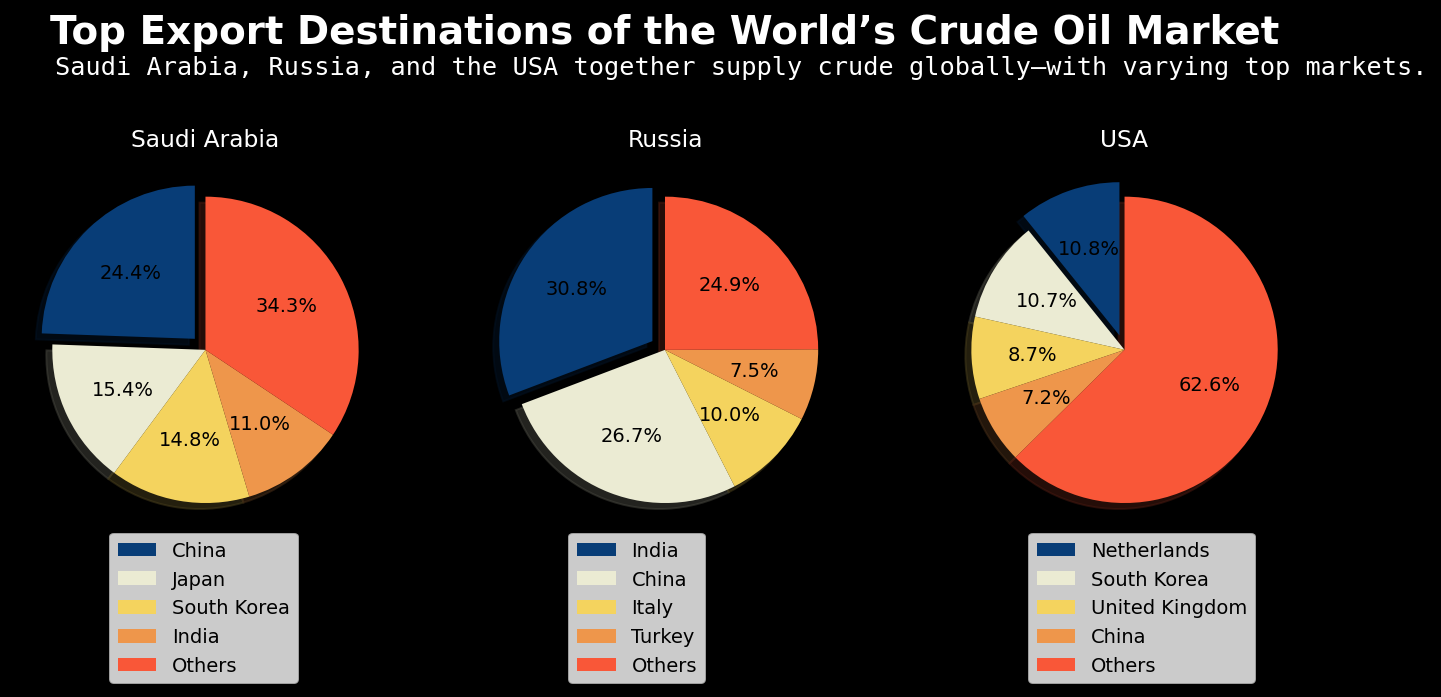

In [42]:
# Filter for top 3 exporter globally
df_SAU = df[df["ORIGIN COUNTRY"] == "Saudi Arabia"].copy()
df_RUS = df[df["ORIGIN COUNTRY"] == "Russia"].copy()
df_USA = df[df["ORIGIN COUNTRY"] == "United States"].copy()

# Group by month and destination trading region
df_SAU = df_SAU.groupby(["DESTINATION COUNTRY"])["QUANTITY (bbl)"].sum().reset_index().sort_values(by="QUANTITY (bbl)", ascending=False, ignore_index=True)
df_RUS = df_RUS.groupby(["DESTINATION COUNTRY"])["QUANTITY (bbl)"].sum().reset_index().sort_values(by="QUANTITY (bbl)", ascending=False, ignore_index=True)
df_USA = df_USA.groupby(["DESTINATION COUNTRY"])["QUANTITY (bbl)"].sum().reset_index().sort_values(by="QUANTITY (bbl)", ascending=False, ignore_index=True)

# Store DataFrames in a dictionary
df_dict = {"Saudi Arabia": df_SAU,
           "Russia": df_RUS,
           "USA": df_USA}

# Process each DataFrame
for key in df_dict:
    df_ = df_dict[key]
    others = {'DESTINATION COUNTRY': 'Others', 'QUANTITY (bbl)': df_.loc[4:,['QUANTITY (bbl)']].sum().values[0]}
    df_   = pd.concat([df_.loc[:3,:], pd.DataFrame([others])], ignore_index=True)
    df_.rename(columns = {"DESTINATION COUNTRY": "COUNTRY", "QUANTITY (bbl)": "QUANTITY"}, inplace=True)
    df_dict[key] = df_

# # Example: display Medium-Sour processed data
# display(df_dict["Saudi Arabia"])

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
fig.patch.set_facecolor('black')

gs = fig.add_gridspec(1, 3)
gs.update(wspace=0, hspace=0)

explode = (0.1, 0, 0, 0, 0)

# Define a list of pairs
pair = [(0, "Saudi Arabia"),
        (1, "Russia"),
        (2, "USA")]

# Loop through and plot
for num, key in pair:
    # Create label list
    original_labels = df_dict[key].COUNTRY.tolist()
    labels = ["" for label in original_labels]

    ax[num].tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)
    wedges, texts, autotexts = ax[num].pie(df_dict[key].QUANTITY, labels=labels, autopct='%1.1f%%', 
            colors=col, explode=explode, shadow=True, startangle=90, radius=1)
    
    ax[num].legend(wedges, original_labels, loc=[0.25, -0.37])    
    ax[num].set_title(key)
    ax[num].title.set_color('white')

ax[1].text(0, 2, 'Top Export Destinations of the World’s Crude Oil Market', 
           fontfamily='sans-serif', fontsize=20, fontweight='bold', color='white', ha='center')
ax[1].text(0.5, 1.8, 'Saudi Arabia, Russia, and the USA together supply crude globally—with varying top markets.', 
           fontfamily='monospace', fontsize=13, fontweight='light', color='white', ha='center')

plt.show()

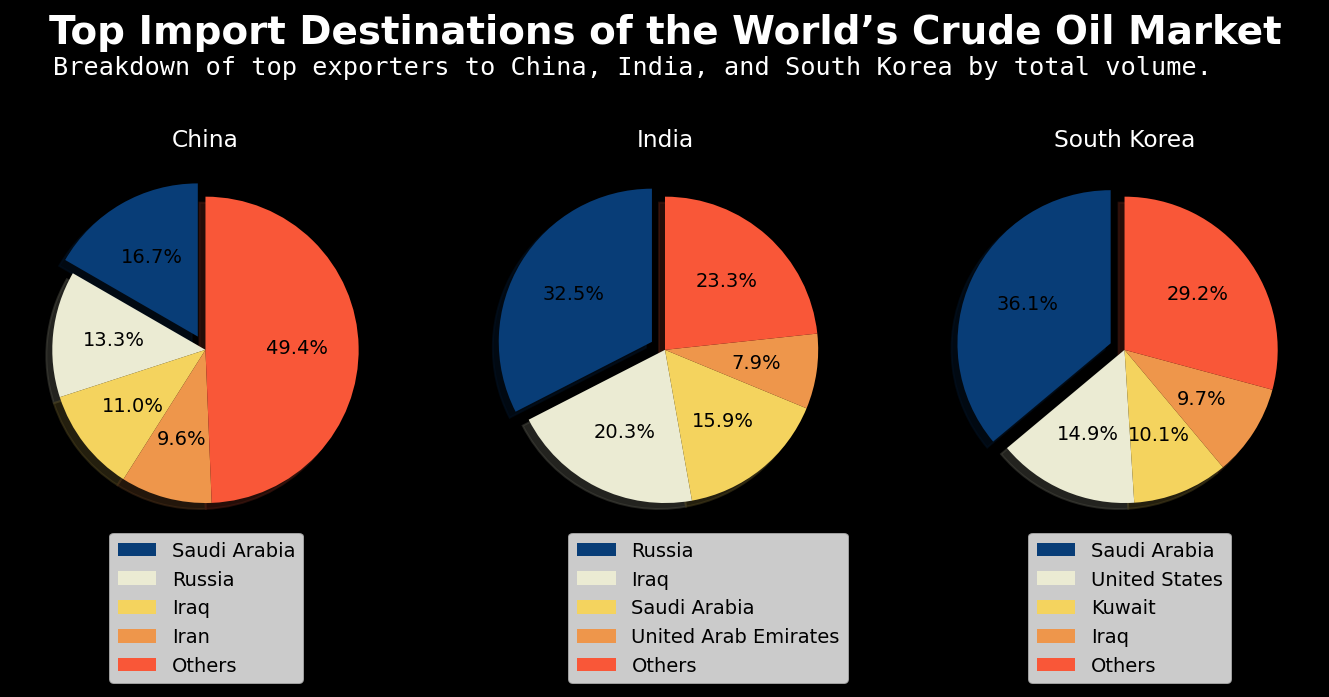

In [43]:
# Filter for top 3 exporter globally
df_SAU = df[df["DESTINATION COUNTRY"] == "China"].copy()
df_RUS = df[df["DESTINATION COUNTRY"] == "India"].copy()
df_USA = df[df["DESTINATION COUNTRY"] == "South Korea"].copy()

# Group by month and destination trading region
df_SAU = df_SAU.groupby(["ORIGIN COUNTRY"])["QUANTITY (bbl)"].sum().reset_index().sort_values(by="QUANTITY (bbl)", ascending=False, ignore_index=True)
df_RUS = df_RUS.groupby(["ORIGIN COUNTRY"])["QUANTITY (bbl)"].sum().reset_index().sort_values(by="QUANTITY (bbl)", ascending=False, ignore_index=True)
df_USA = df_USA.groupby(["ORIGIN COUNTRY"])["QUANTITY (bbl)"].sum().reset_index().sort_values(by="QUANTITY (bbl)", ascending=False, ignore_index=True)

# Store DataFrames in a dictionary
df_dict = {"China": df_SAU,
           "India": df_RUS,
           "South Korea": df_USA}

# Process each DataFrame
for key in df_dict:
    df_ = df_dict[key]
    others = {'ORIGIN COUNTRY': 'Others', 'QUANTITY (bbl)': df_.loc[4:,['QUANTITY (bbl)']].sum().values[0]}
    df_   = pd.concat([df_.loc[:3,:], pd.DataFrame([others])], ignore_index=True)
    df_.rename(columns = {"ORIGIN COUNTRY": "COUNTRY", "QUANTITY (bbl)": "QUANTITY"}, inplace=True)
    df_dict[key] = df_

# # Example: display Medium-Sour processed data
# display(df_dict["Saudi Arabia"])

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
fig.patch.set_facecolor('black')

gs = fig.add_gridspec(1, 3)
gs.update(wspace=0, hspace=0)

explode = (0.1, 0, 0, 0, 0)

# Define a list of pairs
pair = [(0, "China"),
        (1, "India"),
        (2, "South Korea")]

# Loop through and plot
for num, key in pair:
    # Create label list
    original_labels = df_dict[key].COUNTRY.tolist()
    labels = ["" for label in original_labels]

    ax[num].tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)
    wedges, texts, autotexts = ax[num].pie(df_dict[key].QUANTITY, labels=labels, autopct='%1.1f%%', 
            colors=col, explode=explode, shadow=True, startangle=90, radius=1)
    
    ax[num].legend(wedges, original_labels, loc=[0.25, -0.37])    
    ax[num].set_title(key)
    ax[num].title.set_color('white')

ax[1].text(0, 2, 'Top Import Destinations of the World’s Crude Oil Market', 
           fontfamily='sans-serif', fontsize=20, fontweight='bold', color='white', ha='center')
ax[1].text(-0.21, 1.8, 'Breakdown of top exporters to China, India, and South Korea by total volume.', 
           fontfamily='monospace', fontsize=13, fontweight='light', color='white', ha='center')

plt.show()

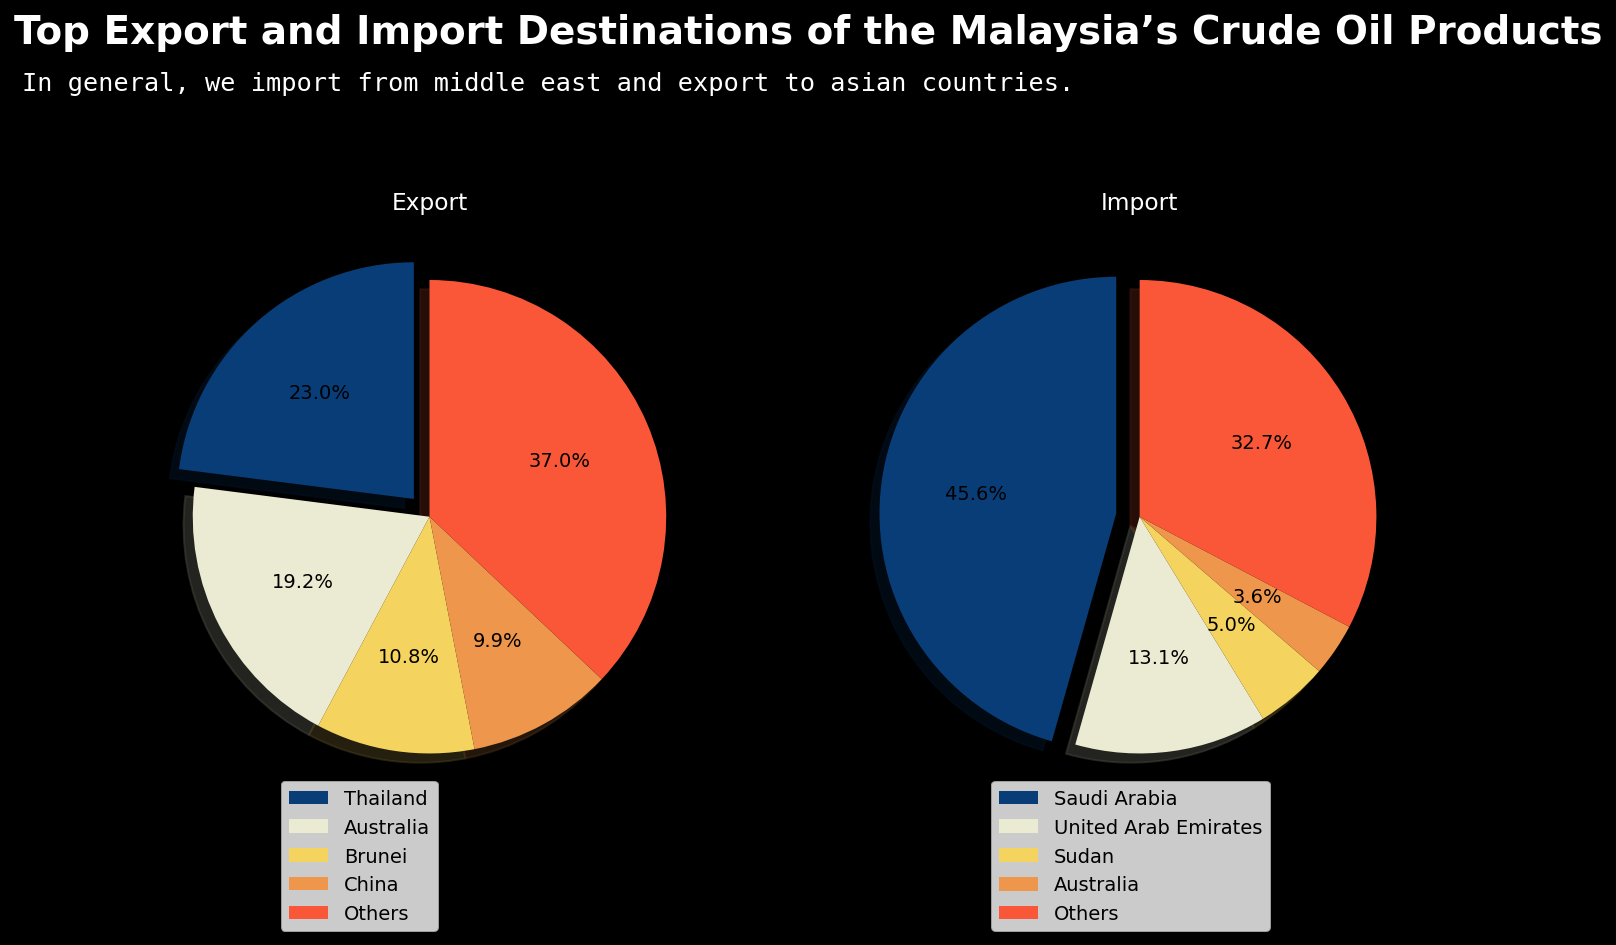

In [44]:
# Find the Malaysia's business partners
exporter    = (df[df["ORIGIN COUNTRY"] == "Malaysia"].copy()
               .groupby("DESTINATION COUNTRY")["QUANTITY (bbl)"].sum().reset_index()
               .sort_values(by=["QUANTITY (bbl)"], ascending=False).reset_index()
               .drop(labels='index', axis=1))
exporter.rename(columns={"DESTINATION COUNTRY": "COUNTRY", "QUANTITY (bbl)": "QUANTITY"}, inplace=True)

importer    = (df[df["DESTINATION COUNTRY"] == "Malaysia"].copy()
               .groupby("ORIGIN COUNTRY")["QUANTITY (bbl)"].sum().reset_index()
               .sort_values(by=["QUANTITY (bbl)"], ascending=False).reset_index()
               .drop(labels='index', axis=1))
importer.rename(columns={"ORIGIN COUNTRY": "COUNTRY", "QUANTITY (bbl)": "QUANTITY"}, inplace=True)

# Process each DataFrame
others   = {'COUNTRY': 'Others', 'QUANTITY': exporter.loc[4:,['QUANTITY']].sum().values[0]}
exporter = pd.concat([exporter.loc[:3,:], pd.DataFrame([others])], ignore_index=True)

others   = {'COUNTRY': 'Others', 'QUANTITY': importer.loc[4:,['QUANTITY']].sum().values[0]}
importer = pd.concat([importer.loc[:3,:], pd.DataFrame([others])], ignore_index=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_facecolor('black')

gs = fig.add_gridspec(1, 3)
gs.update(wspace=0, hspace=0)

explode = (0.1, 0, 0, 0, 0)

# Define a list of pairs
pair = [(0, exporter, "Export"),
        (1, importer, "Import")]

# Loop through and plot
for num, df_, title in pair:
    # Create label list
    original_labels = df_.COUNTRY.tolist()
    labels = ["" for label in original_labels]

    ax[num].tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)
    wedges, texts, autotexts = ax[num].pie(df_.QUANTITY, labels=labels, autopct='%1.1f%%', 
            colors=col, explode=explode, shadow=True, startangle=90, radius=1)
    
    ax[num].legend(wedges, original_labels, loc=[0.25, -0.2])    
    ax[num].set_title(title)
    ax[num].title.set_color('white')

ax[0].text(1.6, 2, 'Top Export and Import Destinations of the Malaysia’s Crude Oil Products', 
           fontfamily='sans-serif', fontsize=20, fontweight='bold', color='white', ha='center')
ax[0].text(0.5, 1.8, 'In general, we import from middle east and export to asian countries.', 
           fontfamily='monospace', fontsize=13, fontweight='light', color='white', ha='center')

plt.show()

## Vessels

### Worldwide - How Big are the Vessels?

In [47]:
# Find the top and bottom 5 primary class by its capacity
class_capacity = (df.groupby("PRIMARY CLASS")
                  ["PRIMARY CAPACITY (cbm)"].mean().reset_index()
                  .sort_values(by=['PRIMARY CAPACITY (cbm)'], ascending=True).reset_index()
                  .drop(labels='index', axis=1))
df_class_capacity = pd.concat([class_capacity.head(5), class_capacity.tail(5)], ignore_index=True)

# To make life easier: rename columns, set index
df_class_capacity.rename(columns      = {"PRIMARY CLASS": "PRIMARY_CLASS", "PRIMARY CAPACITY (cbm)": "PRIMARY_CAPACITY"}, inplace=True)
df_class_capacity["PRIMARY_CAPACITY"] = df_class_capacity["PRIMARY_CAPACITY"].round(0).astype(int)

# display(df_class_capacity)

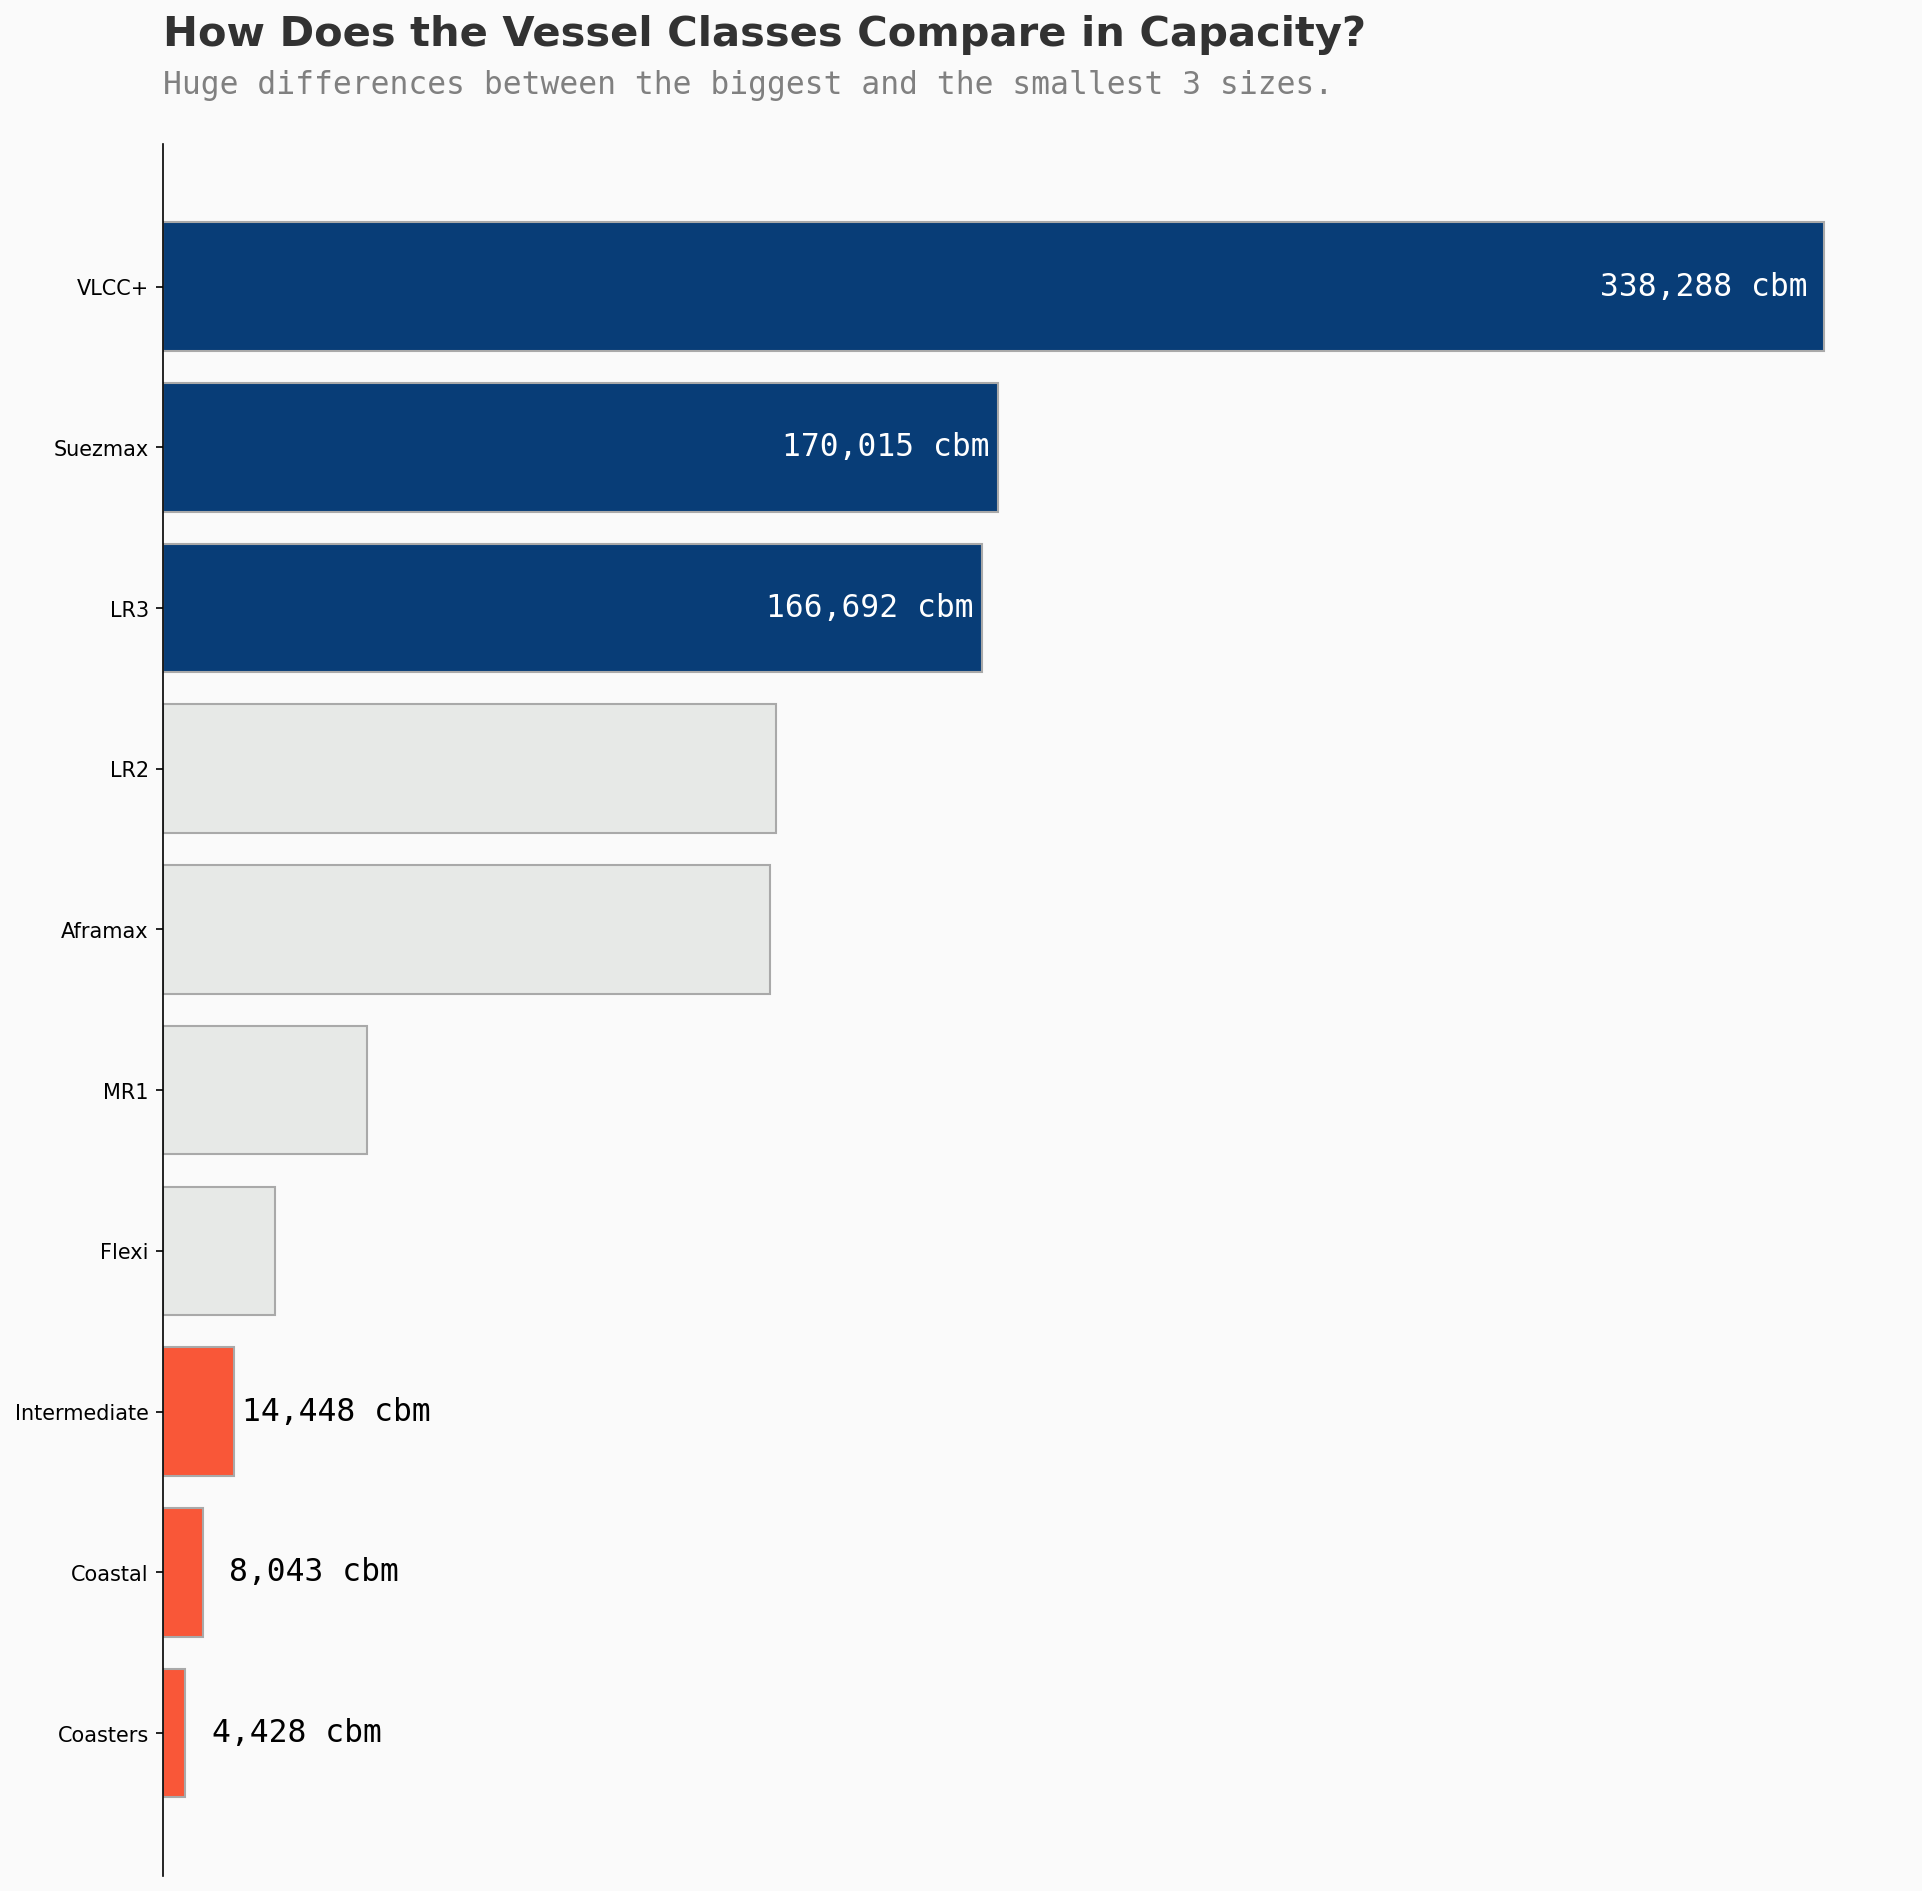

In [48]:
fig = plt.figure(figsize=(15,15),dpi=150)
gs  = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

# Plots 
# Top 5
data = df_class_capacity

# color highlight
color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  col[-1] 
color_map[7] = color_map[8] = color_map[9] =  col[0] 

# base
ax0.barh(data.PRIMARY_CLASS, 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)

# actual
ax0.barh(data.PRIMARY_CLASS, data.PRIMARY_CAPACITY, 
       edgecolor='darkgray',color=color_map)

# text
for i in range(0,3):
    ax0.annotate(f"{data.PRIMARY_CAPACITY[i]:,} cbm", 
                   xy=(data.PRIMARY_CAPACITY[i]+40000, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='black',rotation=0)
    
for i in range(7,10):
    ax0.annotate(f"{data.PRIMARY_CAPACITY[i]:,} cbm", 
                   xy=(data.PRIMARY_CAPACITY[i]-(data.PRIMARY_CAPACITY[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)
    
ax0.axes.get_xaxis().set_ticks([])
# ax0.axes.get_yaxis().set_ticks([])

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.text(0,10.5,'How Does the Vessel Classes Compare in Capacity?',fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
ax0.text(0,10.2,'Huge differences between the biggest and the smallest 3 sizes.',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

plt.show()

### Malaysia - What About Malaysia's?

In [50]:
# Find the top and bottom 5 primary class by its capacity
df_MYS         = df[(df["ORIGIN COUNTRY"] == "Malaysia")].copy()
class_count    = df_MYS.groupby("PRIMARY CLASS")["PRIMARY CLASS"].count().reset_index(name="Count")
class_capacity = (df_MYS.groupby("PRIMARY CLASS")
                  ["PRIMARY CAPACITY (cbm)"].mean().reset_index()
                  .sort_values(by=['PRIMARY CAPACITY (cbm)'], ascending=True).reset_index()
                  .drop(labels='index', axis=1))
df_class       = pd.merge(class_count, class_capacity, on="PRIMARY CLASS", how="inner").sort_values(by=['Count'], ascending=True).reset_index().drop(labels='index', axis=1)
df_class       = pd.concat([df_class.head(5), df_class.tail(5)], ignore_index=True)

# To make life easier: rename columns, set index
df_class.rename(columns      = {"PRIMARY CLASS": "PRIMARY_CLASS", "PRIMARY CAPACITY (cbm)": "PRIMARY_CAPACITY"}, inplace=True)
df_class["PRIMARY_CAPACITY"] = df_class["PRIMARY_CAPACITY"].round(0).astype(int)

# display(df_class)

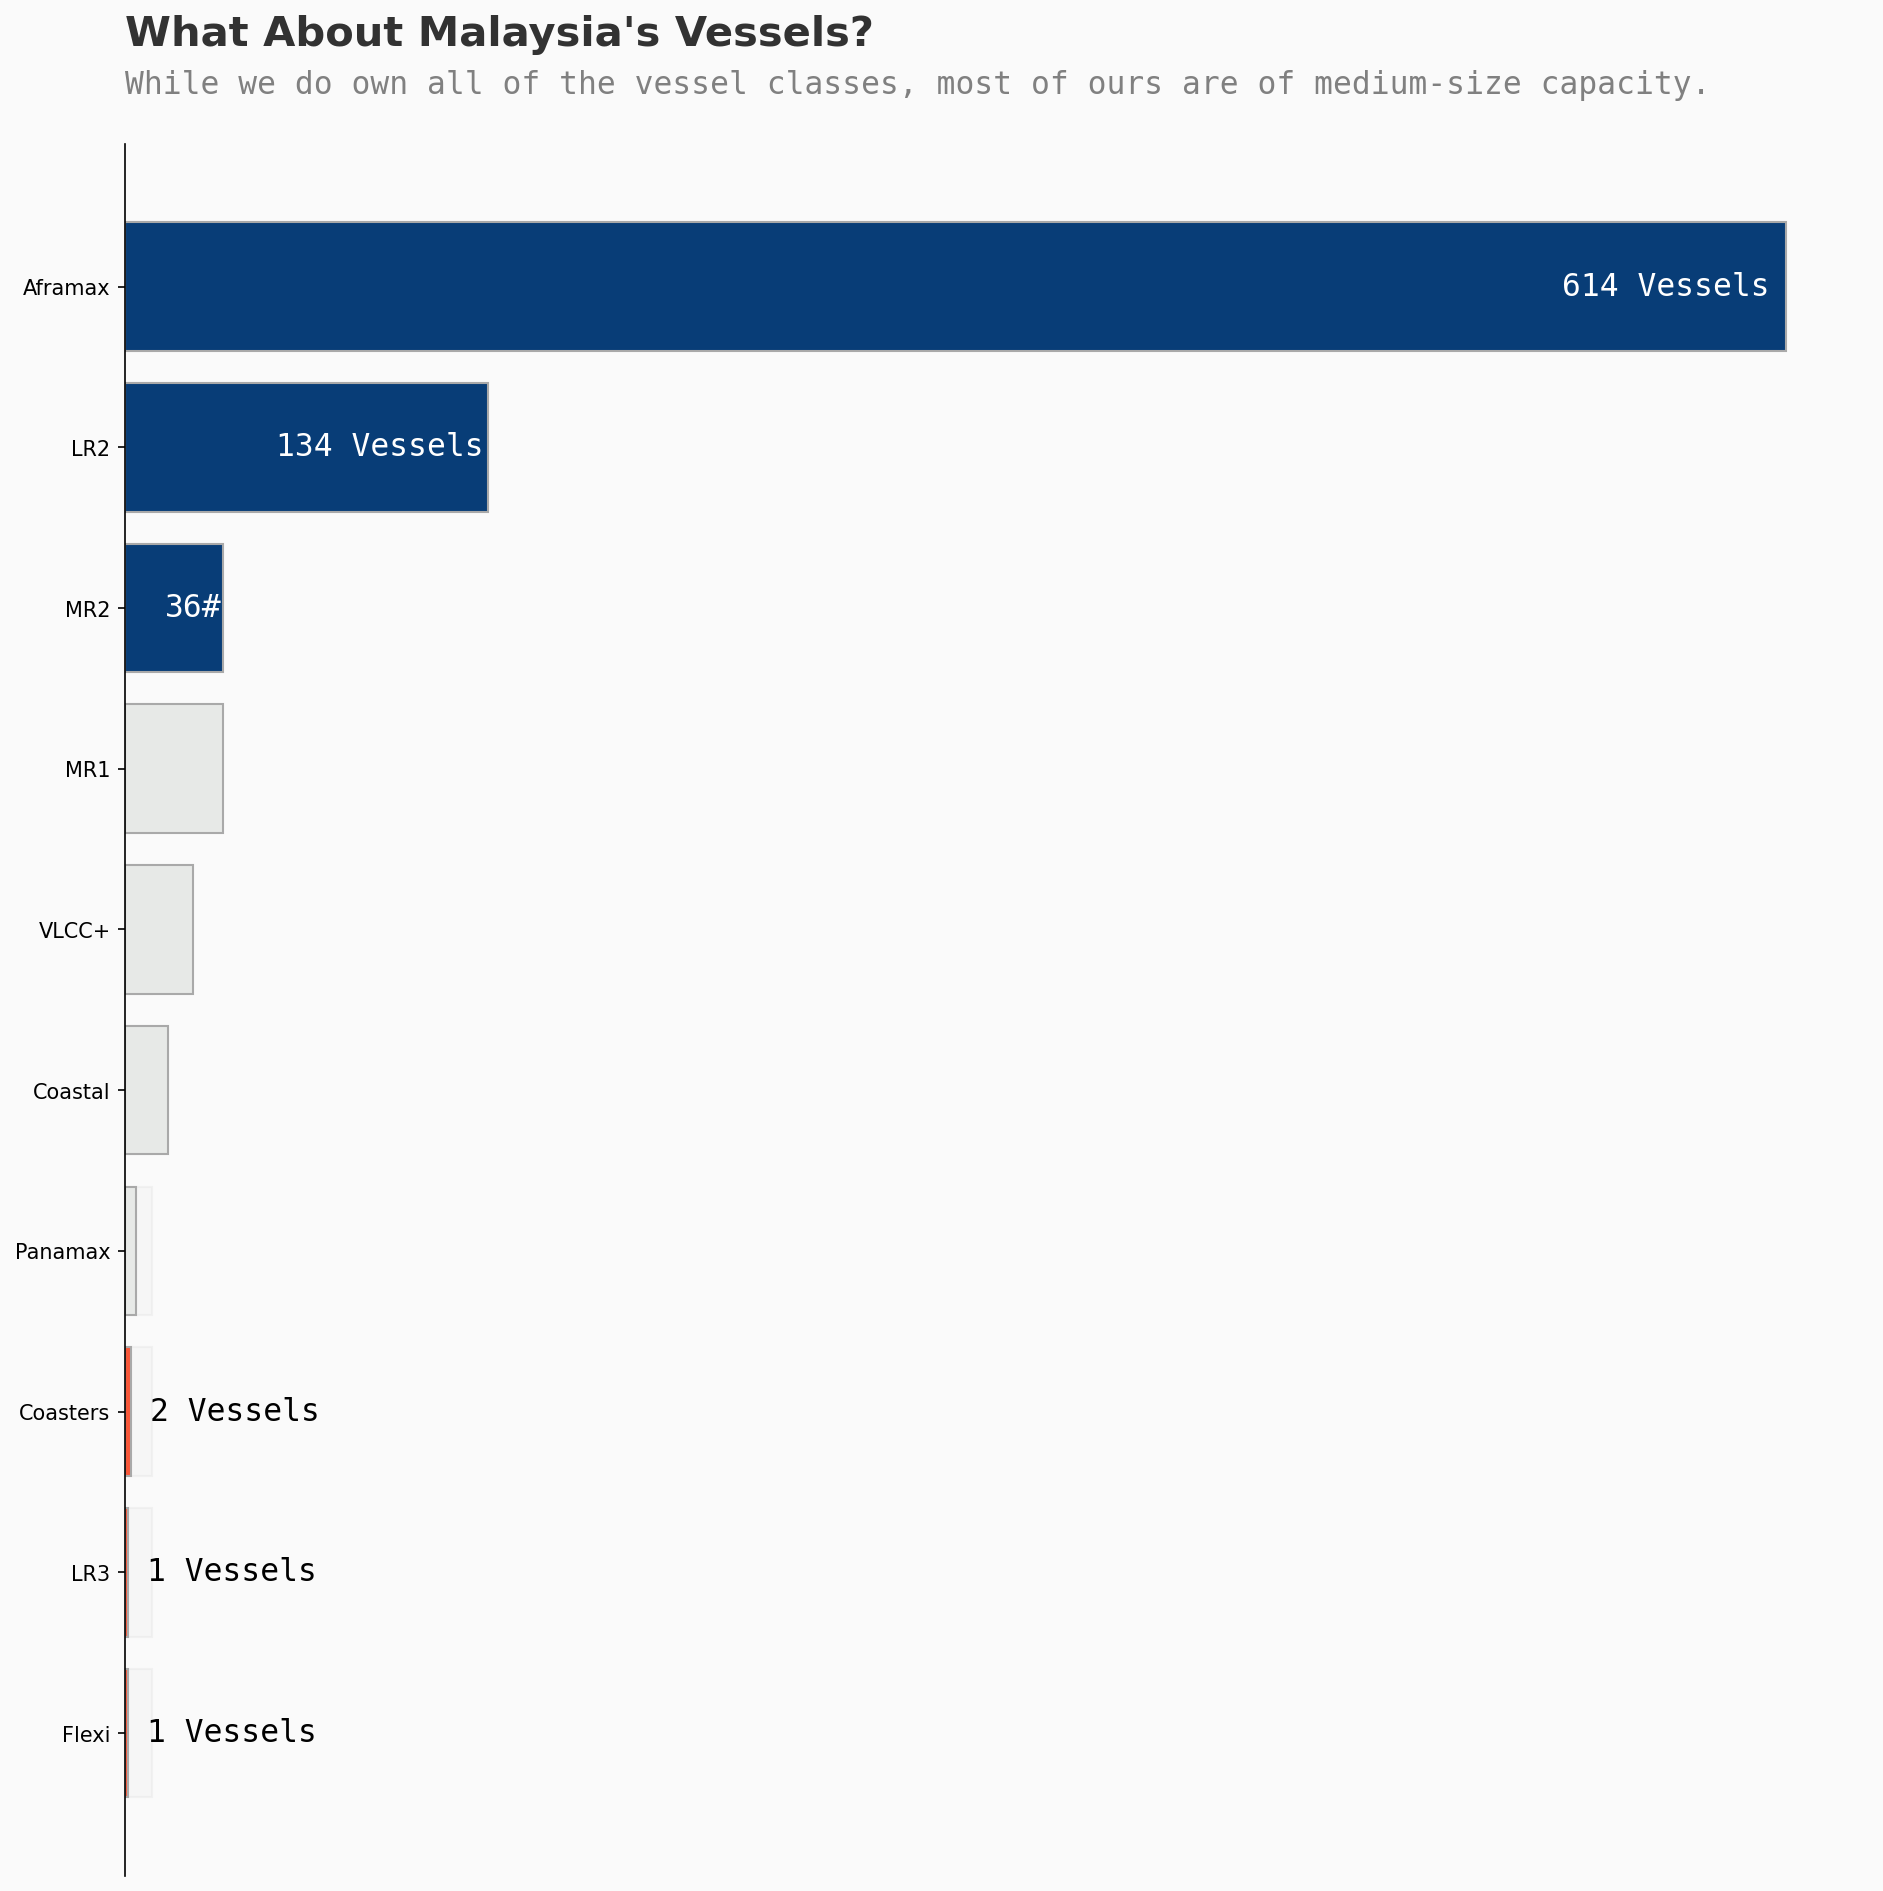

In [51]:
fig = plt.figure(figsize=(15,15),dpi=150)
gs  = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

# Plots 
# Top 5
data = df_class

# color highlight
color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  col[-1] 
color_map[7] = color_map[8] = color_map[9] =  col[0] 

# base
ax0.barh(data.PRIMARY_CLASS, 10, 
       edgecolor='darkgray',color='lightgray',alpha=0.1)

# actual
ax0.barh(data.PRIMARY_CLASS, data.Count, 
       edgecolor='darkgray',color=color_map)

# text
for i in range(0,3):
    ax0.annotate(f"{data.Count[i]} Vessels", 
                   xy=(data.Count[i]+70, i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='black',rotation=0)
    
for i in range(8,10):
    ax0.annotate(f"{data.Count[i]} Vessels", 
                   xy=(data.Count[i]-(data.Count[i]*0.01), i), 
                   va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)

i=7
ax0.annotate(f"{data.Count[i]}#", 
               xy=(data.Count[i]-(data.Count[i]*0.01), i), 
               va = 'center', ha='right',fontweight='light', fontfamily='monospace',fontsize=15, color='white',rotation=0)
    
ax0.axes.get_xaxis().set_ticks([])
# ax0.axes.get_yaxis().set_ticks([])

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.text(0,10.5,"What About Malaysia's Vessels?",fontfamily='sans-serif',fontsize=20,fontweight='bold',color='#323232')
ax0.text(0,10.2,'While we do own all of the vessel classes, most of ours are of medium-size capacity.',fontfamily='monospace',fontsize=15,fontweight='light',color='gray')

plt.show()

## Product

### Worldwide - What's the Most Traded Products?

In [54]:
# Filter for top products globally
df_product = df.copy()
df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# Group by month and destination trading region
df_product = df_product.groupby(["Month", "PRODUCT CATEGORY"])["QUANTITY (bbl)"].sum().reset_index()

# Pivot for plotting
pivot_product = df_product.pivot(index="Month", columns="PRODUCT CATEGORY", values="QUANTITY (bbl)").fillna(0)

# display(df_product)
# display(pivot_product)

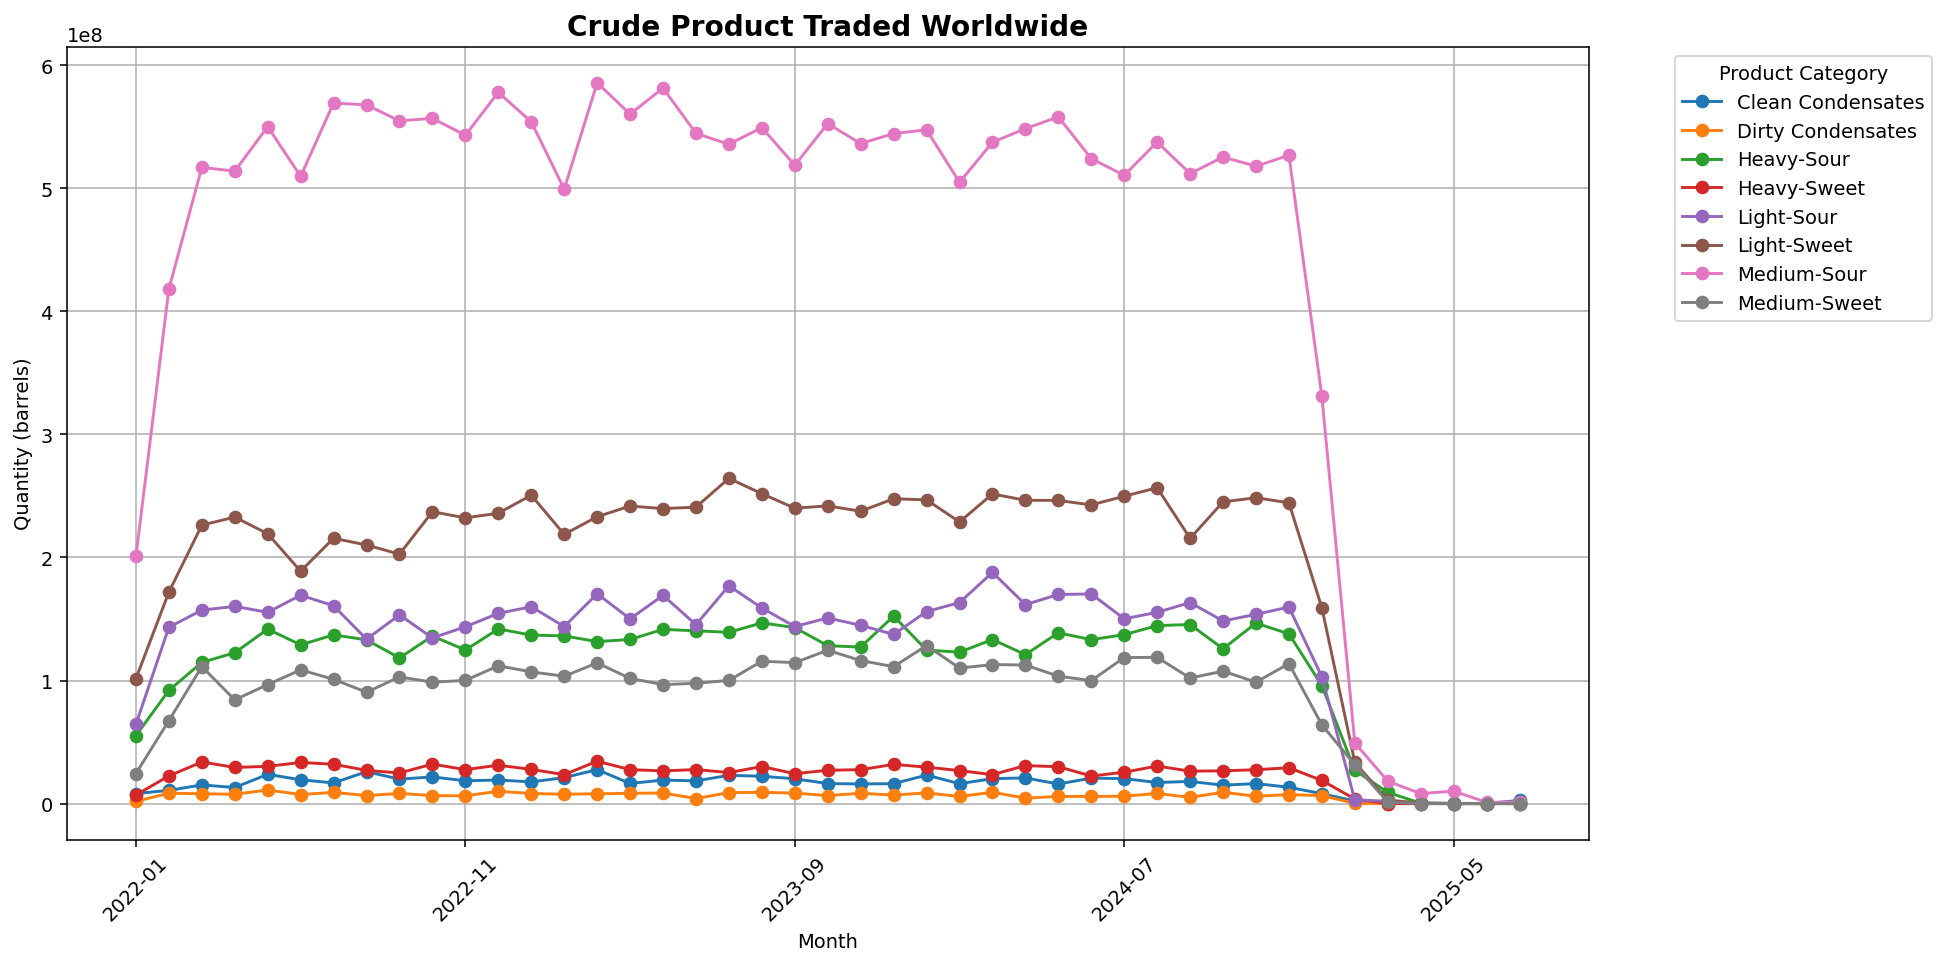

In [55]:
# Define a list of (DataFrame, title) pairs
export_data = [(pivot_product, "Crude Product Traded Worldwide")]

# Loop through and plot
for df_pivot, title in export_data:
    plt.figure(figsize=(14, 7))
    df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
    plt.title(f"{title}", fontweight='heavy', size='x-large')
    plt.xlabel("Month")
    plt.ylabel("Quantity (barrels)")
    plt.xticks(rotation=45)
    plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [56]:
# # Find top grade being traded worldwide
# df_product = df[df["PRODUCT CATEGORY"] == "Medium-Sour"].copy()
# df_product = df_product.groupby(["PRODUCT GRADE"])["QUANTITY (bbl)"].sum().sort_values()

# # display(df_product)

In [57]:
# # Filter for top products globally
# df_product = df[df["PRODUCT CATEGORY"] == "Medium-Sour"].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT GRADE"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT GRADE", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [58]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "Medium-Sour Product Exported Worldwide: Arab Light Top the Chart")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [59]:
# # Find Countries that produced them
# df_product = df[(df["PRODUCT CATEGORY"] == "Medium-Sour") & (df["PRODUCT GRADE"] == "Arab Light")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "ORIGIN COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="ORIGIN COUNTRY", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [60]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "Arab Light Product Exported Worldwide: Mostly Produced & Exported by Saudi Arabia.")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

### Saudi - Arab-Light Aside, What Other Product They Produced & Exported?

In [62]:
# # Find Countries that produced them
# df_product = df[(df["ORIGIN COUNTRY"] == "Saudi Arabia")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT CATEGORY"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT CATEGORY", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [63]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "Saudi Arabia Product Exported Worldwide: Medium-Sour Follows by Light-Sour")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [64]:
# # Find Countries that produced them
# df_product = df[(df["ORIGIN COUNTRY"] == "Saudi Arabia")].copy()
# df_product = df_product[(df["PRODUCT CATEGORY"] == "Medium-Sour") | (df["PRODUCT CATEGORY"] == "Light-Sour")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT CATEGORY", "PRODUCT GRADE"])["QUANTITY (bbl)"].sum().reset_index()

# # Combine products category & grade together
# df_product["PRODUCT"] = df_product["PRODUCT CATEGORY"] + " - " + df_product["PRODUCT GRADE"]
# df_product.drop(["PRODUCT CATEGORY","PRODUCT GRADE"], axis=1, inplace=True)
# df_product = df_product[['Month', 'PRODUCT', 'QUANTITY (bbl)']]

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [65]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "Saudi Arabia's Medium-Sour & Light-Sour Product Exported Worldwide")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Category - Product Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

### Russia - What Do They Produced?

In [67]:
# # Find Countries that produced them
# df_product = df[(df["ORIGIN COUNTRY"] == "Russia")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT CATEGORY"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT CATEGORY", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [68]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "Russia's Crude Product Exported Worldwide")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [69]:
# # Find Countries that produced them
# df_product = df[(df["ORIGIN COUNTRY"] == "Russia")].copy()
# df_product = df_product[(df["PRODUCT CATEGORY"] == "Medium-Sour") | (df["PRODUCT CATEGORY"] == "Light-Sour")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT CATEGORY", "PRODUCT GRADE"])["QUANTITY (bbl)"].sum().reset_index()

# # Combine products category & grade together
# df_product["PRODUCT"] = df_product["PRODUCT CATEGORY"] + " - " + df_product["PRODUCT GRADE"]
# df_product.drop(["PRODUCT CATEGORY","PRODUCT GRADE"], axis=1, inplace=True)
# df_product = df_product[['Month', 'PRODUCT', 'QUANTITY (bbl)']]

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [70]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "Russia's Medium-Sour & Light-Sour Product Exported Worldwide")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Category - Product Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

### USA - What Do They Produced?

In [72]:
# # Find Countries that produced them
# df_product = df[(df["ORIGIN COUNTRY"] == "United States")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT CATEGORY"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT CATEGORY", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [73]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "USA's Crude Product Exported Worldwide")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [74]:
# # Find Countries that produced them
# df_product = df[(df["ORIGIN COUNTRY"] == "United States")].copy()
# df_product = df_product[(df["PRODUCT CATEGORY"] == "Light-Sweet")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT CATEGORY", "PRODUCT GRADE"])["QUANTITY (bbl)"].sum().reset_index()

# # Combine products category & grade together
# df_product["PRODUCT"] = df_product["PRODUCT CATEGORY"] + " - " + df_product["PRODUCT GRADE"]
# df_product.drop(["PRODUCT CATEGORY","PRODUCT GRADE"], axis=1, inplace=True)
# df_product = df_product[['Month', 'PRODUCT', 'QUANTITY (bbl)']]

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)


In [75]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "USA's Light-Sweet Product Exported Worldwide")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Category - Product Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

### Malaysia - Malaysian Products?

In [77]:
# # Find Countries that produced them
# df_product = df[(df["ORIGIN COUNTRY"] == "Malaysia")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT CATEGORY"])["QUANTITY (bbl)"].sum().reset_index()

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT CATEGORY", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [78]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "Malaysia's Crude Product Exported Worldwide")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [79]:
# # Find Countries that produced them
# df_product = df[(df["ORIGIN COUNTRY"] == "Malaysia")].copy()
# df_product = df_product[(df["PRODUCT CATEGORY"] == "Light-Sweet") | (df["PRODUCT CATEGORY"] == "Medium-Sweet")].copy()
# df_product["Month"] = df_product["ARRIVAL DATE"].dt.to_period("M").astype(str)

# # Group by month and destination trading region
# df_product = df_product.groupby(["Month", "PRODUCT CATEGORY", "PRODUCT GRADE"])["QUANTITY (bbl)"].sum().reset_index()

# # Combine products category & grade together
# df_product["PRODUCT"] = df_product["PRODUCT CATEGORY"] + " - " + df_product["PRODUCT GRADE"]
# df_product.drop(["PRODUCT CATEGORY","PRODUCT GRADE"], axis=1, inplace=True)
# df_product = df_product[['Month', 'PRODUCT', 'QUANTITY (bbl)']]

# # Pivot for plotting
# pivot_product = df_product.pivot(index="Month", columns="PRODUCT", values="QUANTITY (bbl)").fillna(0)

# # display(df_product)
# # display(pivot_product)

In [80]:
# # Define a list of (DataFrame, title) pairs
# export_data = [(pivot_product, "Malaysia's Light-Sweet & Medium-Sweet Product Exported Worldwide")]

# # Loop through and plot
# for df_pivot, title in export_data:
#     plt.figure(figsize=(14, 7))
#     df_pivot.plot(kind="line", marker='o', ax=plt.gca())  # use current axes
#     plt.title(f"{title}", fontweight='heavy', size='x-large')
#     plt.xlabel("Month")
#     plt.ylabel("Quantity (barrels)")
#     plt.xticks(rotation=45)
#     plt.legend(title="Product Category - Product Grade", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

### Summary

In [82]:
# Filter for top products globally
df_med_sour = df[(df["PRODUCT CATEGORY"] == "Medium-Sour")].copy()
df_lig_swee = df[(df["PRODUCT CATEGORY"] == "Light-Sweet")].copy()
df_lig_sour = df[(df["PRODUCT CATEGORY"] == "Light-Sour")].copy()

# Store DataFrames in a dictionary
df_dict = {"Medium-Sour": df_med_sour,
           "Light-Sweet": df_lig_swee,
           "Light-Sour": df_lig_sour}

# Process each DataFrame
for key in df_dict:
    df_ = df_dict[key]
    df_["PRODUCT"] = df_["ORIGIN COUNTRY"] + " - " + df_["PRODUCT GRADE"]
    df_ = (df_[['PRODUCT', 'QUANTITY (bbl)']]
           .groupby("PRODUCT")["QUANTITY (bbl)"]
           .sum().reset_index()
           .sort_values(by="QUANTITY (bbl)", ascending=False).reset_index(drop=True))
    others = {'PRODUCT': 'Others', 'QUANTITY (bbl)': df_.loc[4:,['QUANTITY (bbl)']].sum().values[0]}
    df_   = pd.concat([df_.loc[:3,:], pd.DataFrame([others])], ignore_index=True)
    df_.rename(columns = {"QUANTITY (bbl)": "QUANTITY"}, inplace=True)
    df_dict[key] = df_

# Example: display Medium-Sour processed data
# display(df_dict["Medium-Sour"])

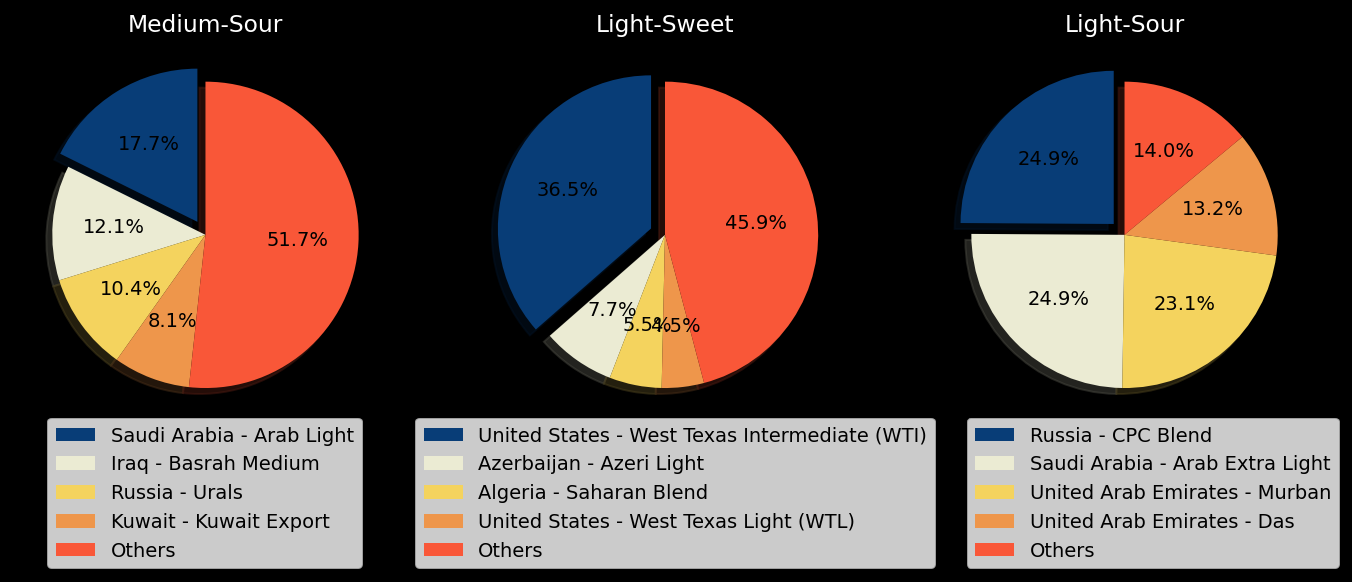

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
fig.patch.set_facecolor('black')

gs = fig.add_gridspec(1, 3)
gs.update(wspace=0, hspace=0)

explode = (0.1, 0, 0, 0, 0)

# Define a list of pairs
pair = [(0, "Medium-Sour"),
        (1, "Light-Sweet"),
        (2, "Light-Sour")]

# Loop through and plot
for num, key in pair:
    # Create label list
    original_labels = df_dict[key].PRODUCT.tolist()
    labels = ["" for label in original_labels]

    ax[num].tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)
    wedges, texts, autotexts = ax[num].pie(df_dict[key].QUANTITY, labels=labels, autopct='%1.1f%%', 
            colors=col, explode=explode, shadow=True, startangle=90, radius=1)
    
    if num == 1:
        ax[num].legend(wedges, original_labels, loc=[-0.15, -0.37])
    else:
        ax[num].legend(wedges, original_labels, loc=[0.09, -0.37])
        
    ax[num].set_title(key)
    ax[num].title.set_color('white')

plt.show()

In [84]:
# Filter for top products globally
df_product  = df[(df["ORIGIN COUNTRY"] == "Malaysia")].copy()
df_med_swee = df_product[(df_product["PRODUCT CATEGORY"] == "Medium-Sweet")].copy()
df_lig_swee = df_product[(df_product["PRODUCT CATEGORY"] == "Light-Sweet")].copy()

# Store DataFrames in a dictionary
df_dict = {"Medium-Sweet": df_med_swee,
           "Light-Sweet": df_lig_swee}

# Process each DataFrame
for key in df_dict:
    df_ = df_dict[key]
    df_["PRODUCT"] = df_["ORIGIN COUNTRY"] + " - " + df_["PRODUCT GRADE"]
    df_ = (df_[['PRODUCT', 'QUANTITY (bbl)']]
           .groupby("PRODUCT")["QUANTITY (bbl)"]
           .sum().reset_index()
           .sort_values(by="QUANTITY (bbl)", ascending=False).reset_index(drop=True))
    others = {'PRODUCT': 'Others', 'QUANTITY (bbl)': df_.loc[4:,['QUANTITY (bbl)']].sum().values[0]}
    df_   = pd.concat([df_.loc[:3,:], pd.DataFrame([others])], ignore_index=True)
    df_.rename(columns = {"QUANTITY (bbl)": "QUANTITY"}, inplace=True)
    df_dict[key] = df_

# Example: display Medium-Sour processed data
# display(df_dict["Medium-Sweet"])

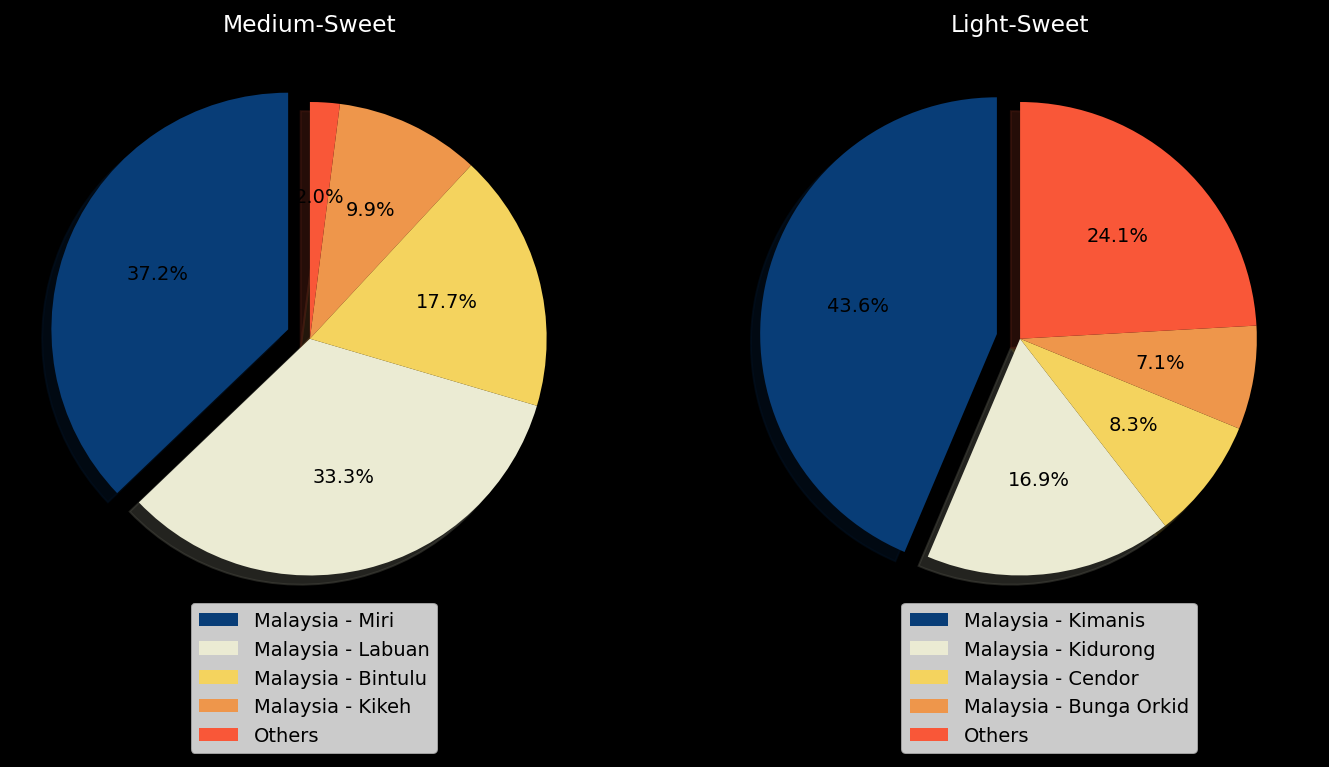

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_facecolor('black')

gs = fig.add_gridspec(1, 3)
gs.update(wspace=0, hspace=0)

explode = (0.1, 0, 0, 0, 0)

# Define a list of pairs
pair = [(0, "Medium-Sweet"),
        (1, "Light-Sweet")]

# Loop through and plot
for num, key in pair:
    # Create label list
    original_labels = df_dict[key].PRODUCT.tolist()
    labels = ["" for label in original_labels]

    ax[num].tick_params(axis = "both", which = "both", left=False, bottom=False,labelbottom=False)
    wedges, texts, autotexts = ax[num].pie(df_dict[key].QUANTITY, labels=labels, autopct='%1.1f%%', 
            colors=col, explode=explode, shadow=True, startangle=90, radius=1)
    
    ax[num].legend(wedges, original_labels, loc=[0.3, -0.2])
        
    ax[num].set_title(key)
    ax[num].title.set_color('white')

plt.show()

## Russia and Its Invasion Implication?

<Figure size 1960x980 with 0 Axes>

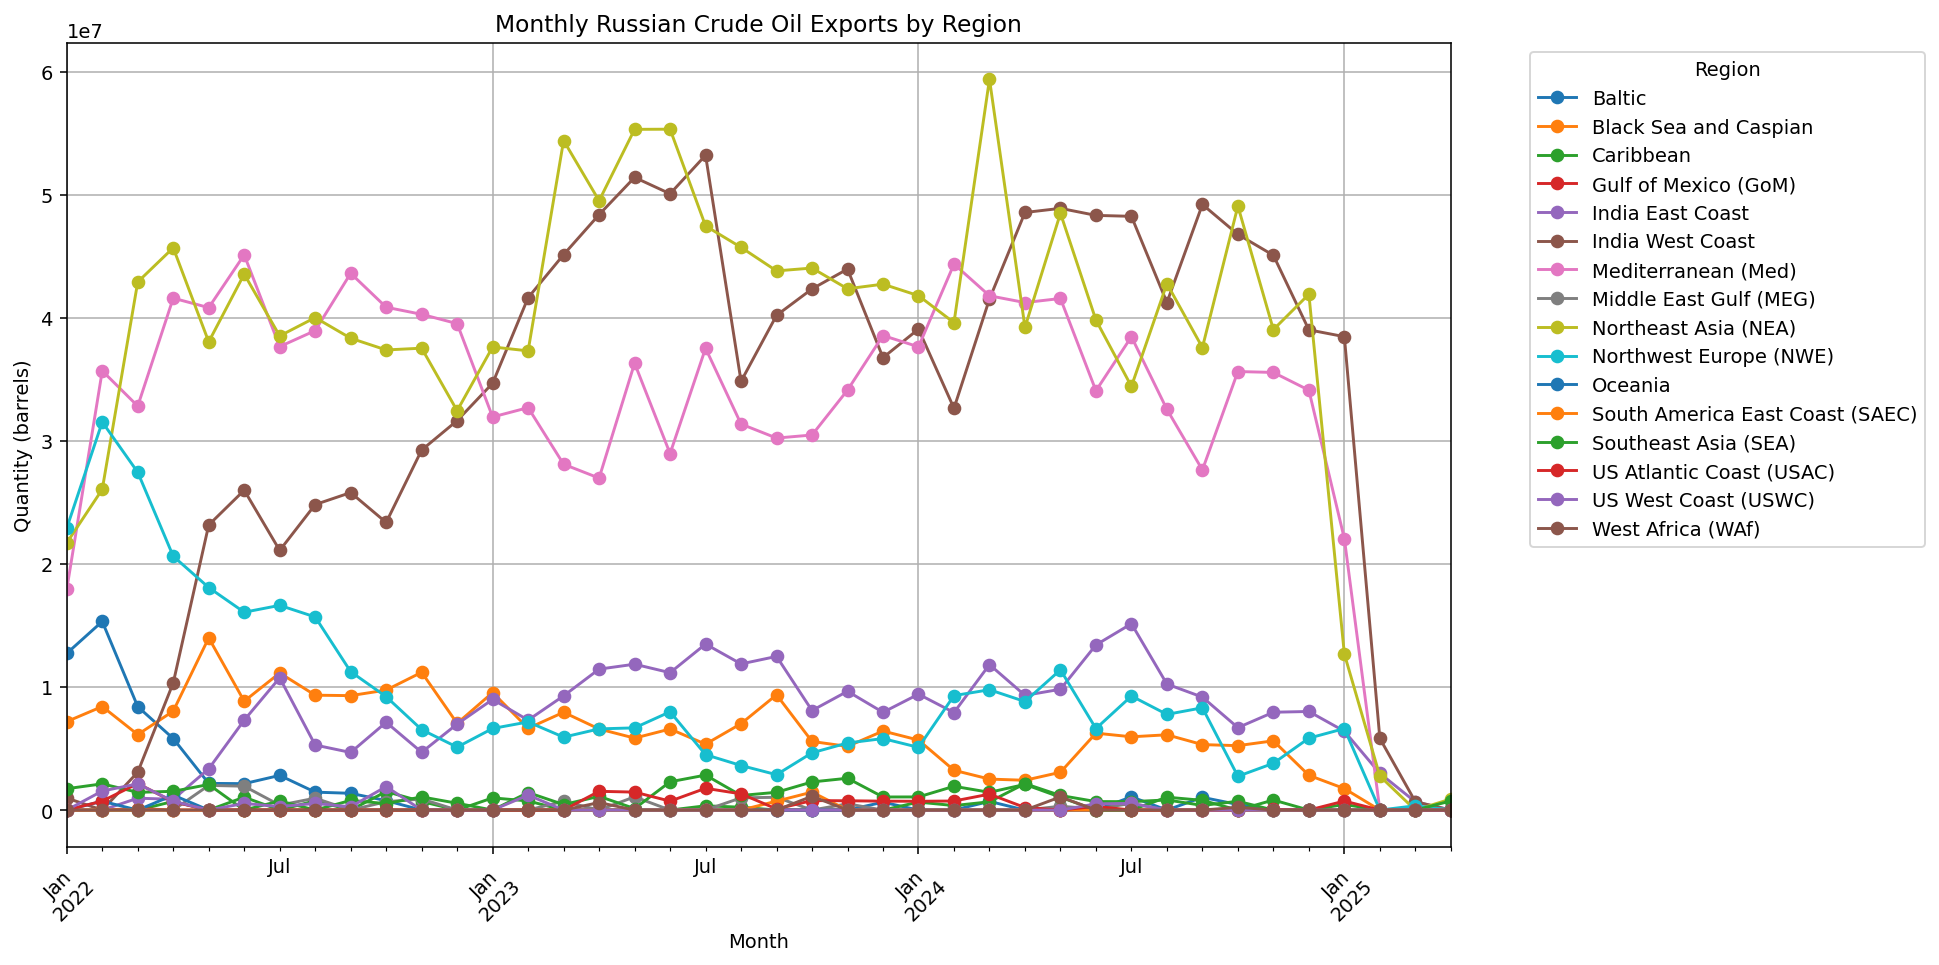

In [87]:
# Group by month and destination trading region
# Filter for Russian-origin crude oil
russian_crudes = ["Russia"]
df_russian_global     = df[(df["ORIGIN COUNTRY"].isin(russian_crudes))]
df_russian_global["Month"]  = df_russian_global["ARRIVAL DATE"].dt.to_period("M")

global_region_imports = df_russian_global.groupby(
    ["Month", "DESTINATION TRADING REGION"]
)["QUANTITY (bbl)"].sum().reset_index()

# Pivot for plotting
pivot_global_region = global_region_imports.pivot(index="Month", columns="DESTINATION TRADING REGION", values="QUANTITY (bbl)").fillna(0)

# Plot
plt.figure(figsize=(14, 7))
pivot_global_region.plot(kind="line", marker='o', figsize=(14, 7))
plt.title("Monthly Russian Crude Oil Exports by Region")
plt.xlabel("Month")
plt.ylabel("Quantity (barrels)")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

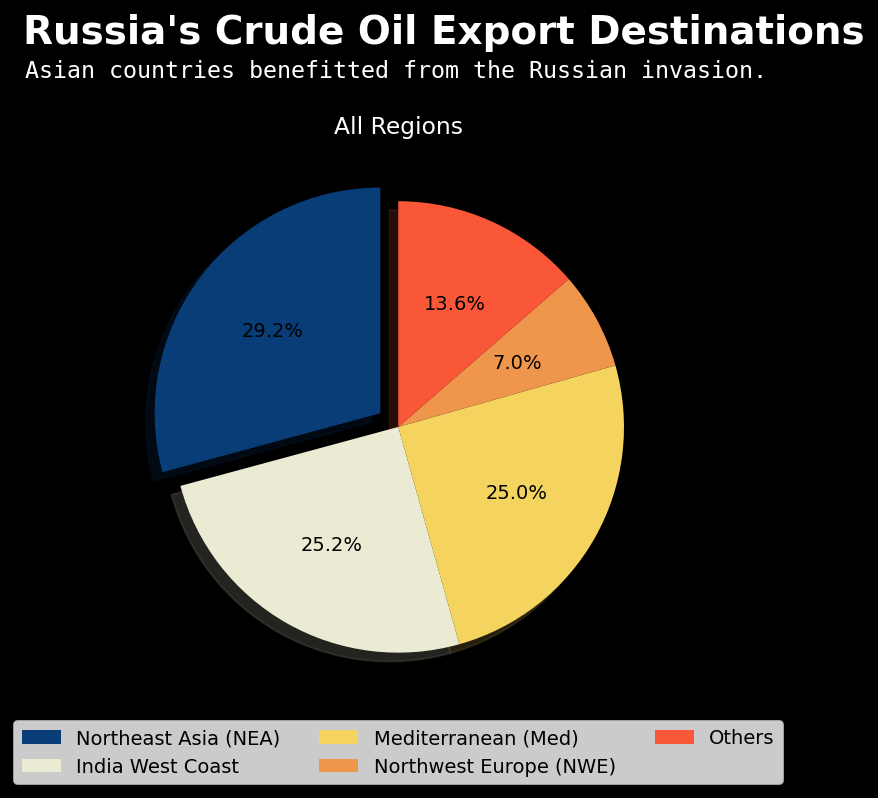

In [88]:
# Prepare data
df_rus = (pivot_global_region
          .sum()
          .sort_values(ascending=False)
          .reset_index(name="QUANTITY")
          .rename(columns={"DESTINATION TRADING REGION": "REGION"}))

# Aggregate lower-ranked regions into "Others"
others = {'REGION': 'Others', 'QUANTITY': df_rus.loc[4:, 'QUANTITY'].sum()}
df_rus = pd.concat([df_rus.loc[:3, :], pd.DataFrame([others])], ignore_index=True)

# display(df_rus)

# Create figure with one axis
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
fig.patch.set_facecolor('black')

# Plot pie chart
explode = (0.1, 0, 0, 0, 0)
labels = ["" for _ in df_rus["REGION"]]
wedges, texts, autotexts = ax.pie(
    df_rus["QUANTITY"],
    labels=labels,
    autopct='%1.1f%%',
    colors=col,
    explode=explode,
    shadow=True,
    startangle=90,
    radius=1
)

ax.legend(wedges, df_rus["REGION"], loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax.set_title("All Regions", color='white')

# Add title and subtitle
ax.text(0.2, 1.7, "Russia's Crude Oil Export Destinations",
        fontfamily='sans-serif', fontsize=20, fontweight='bold', color='white', ha='center')
ax.text(0.02, 1.55, "Asian countries benefitted from the Russian invasion. ", 
        fontfamily='monospace', fontsize=12, fontweight='light', color='white', ha='center')

plt.tight_layout()
plt.show()

### On Asian Countries

In [90]:
# # Filter for Russian crude oil only and Asian destination countries
# # Step 1: Identify relevant columns
# # Step 2: Filter rows where PRODUCT GRADE = "Urals" (Russian crude)
# # Step 3: Filter DESTINATION TRADING REGION as Asian regions
# # Step 4: Aggregate by month

# # Filter for Russian-origin crude oil (e.g., "Urals", "Sokol", "ESPO", "Arco", etc.)
# # russian_crudes = ["Urals", "ESPO", "Sokol", "Arco", "Surgut Blend", "Novy Port", "Vityaz", "Varandey"]
# russian_crudes = ["Russia"]
# asian_regions = ["Northeast Asia (NEA)", "Southeast Asia (SEA)", "South Asia (SA)", "East Asia (EA)"]

# # Filter the dataframe
# df_filtered = df[
#     # (df["PRODUCT GRADE"].isin(russian_crudes)) &
#     (df["ORIGIN COUNTRY"].isin(russian_crudes)) &
#     (df["DESTINATION TRADING REGION"].isin(asian_regions))
# ]

# # Convert arrival date to datetime if not already
# df_filtered["ARRIVAL DATE"] = pd.to_datetime(df_filtered["ARRIVAL DATE"], errors='coerce')

# # Create a 'Month' column for grouping
# df_filtered["Month"] = df_filtered["ARRIVAL DATE"].dt.to_period("M")

# # Aggregate Russian crude oil imports into Asia by month (in barrels)
# monthly_imports = df_filtered.groupby("Month")["QUANTITY (bbl)"].sum().reset_index()
# monthly_imports["Month"] = monthly_imports["Month"].astype(str)

# # monthly_imports.head()

<Figure size 1960x980 with 0 Axes>

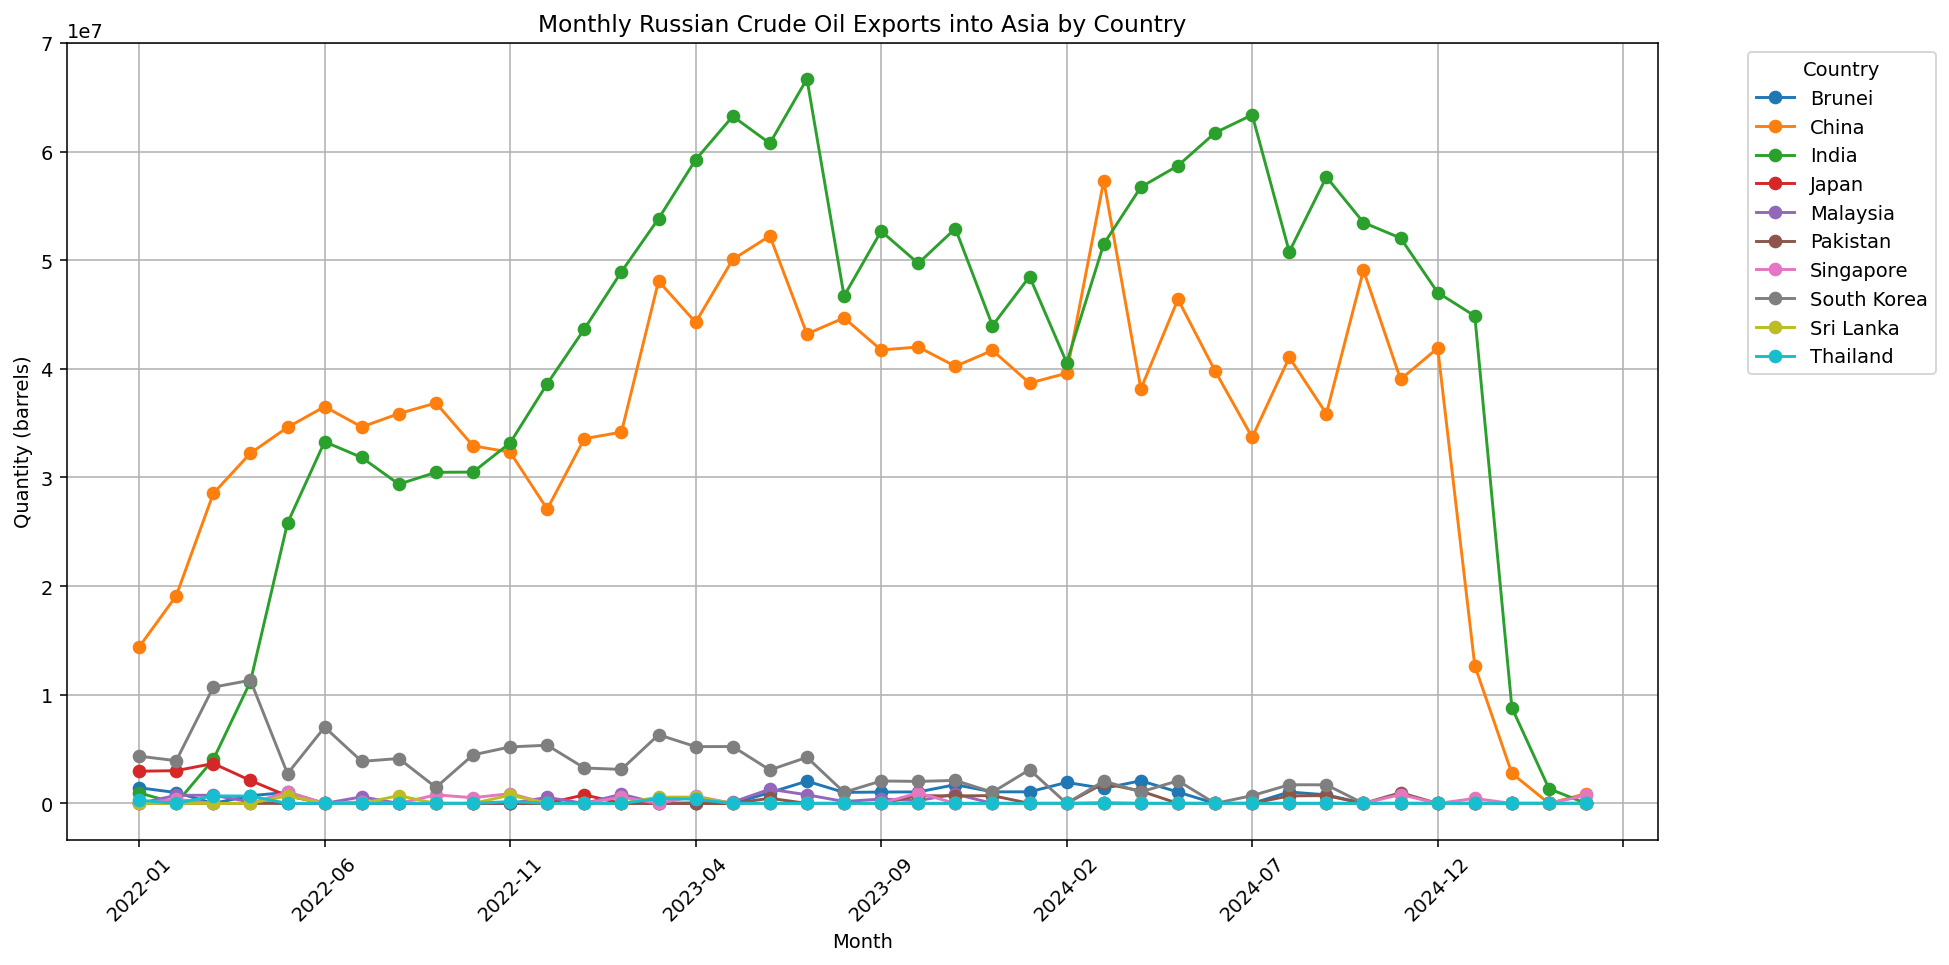

In [91]:
# Filter for Russian-origin crude oil
russian_crudes = ["Russia"]
asian_regions = ["Northeast Asia (NEA)", "Southeast Asia (SEA)", "India East Coast", "India West Coast"]

# Filter the dataframe
df_filtered = df[
    (df["ORIGIN COUNTRY"].isin(russian_crudes)) &
    (df["DESTINATION TRADING REGION"].isin(asian_regions))
]

# Convert arrival date to datetime if not already
df_filtered["ARRIVAL DATE"] = pd.to_datetime(df_filtered["ARRIVAL DATE"], errors='coerce')

# Create a 'Month' column for grouping
df_filtered["Month"] = df_filtered["ARRIVAL DATE"].dt.to_period("M")

# Aggregate Russian crude oil imports into Asia by month (in barrels)
monthly_imports = df_filtered.groupby("Month")["QUANTITY (bbl)"].sum().reset_index()
monthly_imports["Month"] = monthly_imports["Month"].astype(str)

# Grouping by Month and Destination Country to get the total volume by country
monthly_country_imports = df_filtered.groupby(
    [df_filtered["ARRIVAL DATE"].dt.to_period("M").astype(str), "DESTINATION COUNTRY"]
)["QUANTITY (bbl)"].sum().reset_index()

# Rename 'ARRIVAL DATE' to 'Month' for clarity
monthly_country_imports.rename(columns={"ARRIVAL DATE": "Month"}, inplace=True)

# Pivot the data to prepare for charting
pivot_table = monthly_country_imports.pivot(index="Month", columns="DESTINATION COUNTRY", values="QUANTITY (bbl)").fillna(0)

# Plotting
plt.figure(figsize=(14, 7))
pivot_table.plot(kind="line", marker='o', figsize=(14, 7))
plt.title("Monthly Russian Crude Oil Exports into Asia by Country")
plt.xlabel("Month")
plt.ylabel("Quantity (barrels)")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

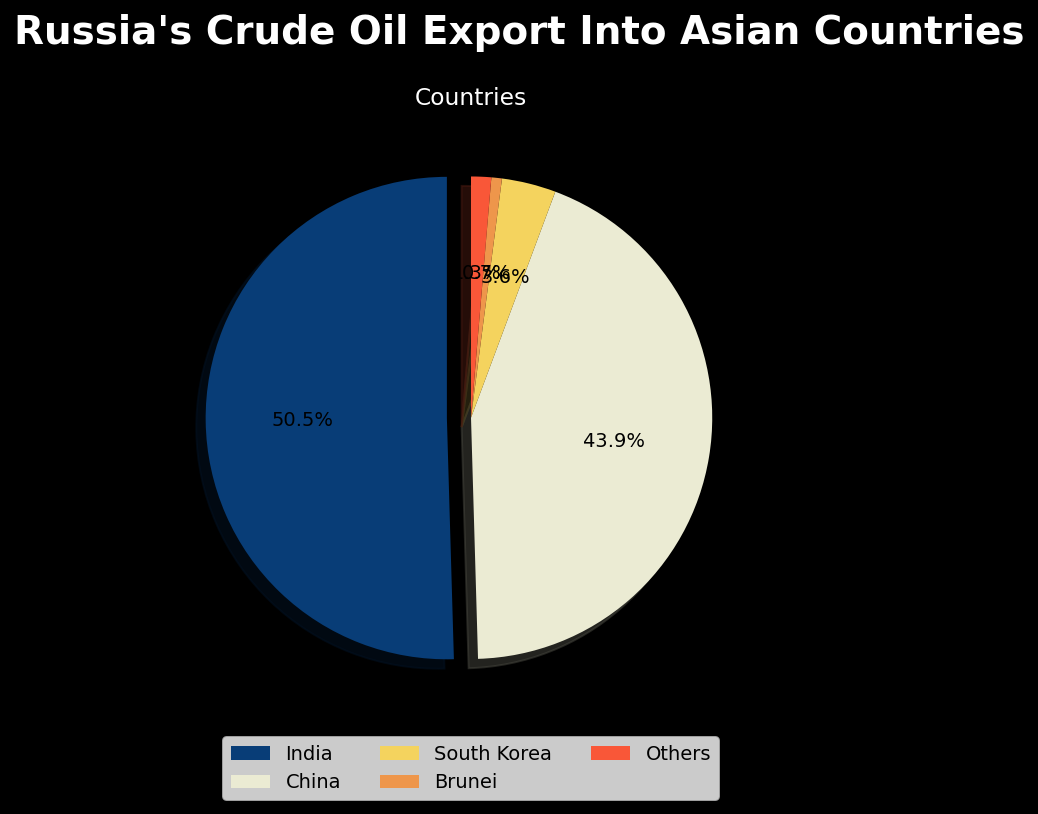

In [92]:
# Prepare data
df_rus = (pivot_table
          .sum()
          .sort_values(ascending=False)
          .reset_index(name="QUANTITY")
          .rename(columns={"DESTINATION COUNTRY": "COUNTRY"}))

# Aggregate lower-ranked regions into "Others"
others = {'COUNTRY': 'Others', 'QUANTITY': df_rus.loc[4:, 'QUANTITY'].sum()}
df_rus = pd.concat([df_rus.loc[:3, :], pd.DataFrame([others])], ignore_index=True)

# Create figure with one axis
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
fig.patch.set_facecolor('black')

# Plot pie chart
explode = (0.1, 0, 0, 0, 0)
labels = ["" for _ in df_rus["COUNTRY"]]
wedges, texts, autotexts = ax.pie(
    df_rus["QUANTITY"],
    labels=labels,
    autopct='%1.1f%%',
    colors=col,
    explode=explode,
    shadow=True,
    startangle=90,
    radius=1
)

ax.legend(wedges, df_rus["COUNTRY"], loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax.set_title("Countries", color='white')

# Add title and subtitle
ax.text(0.2, 1.55, "Russia's Crude Oil Export Into Asian Countries",
        fontfamily='sans-serif', fontsize=20, fontweight='bold', color='white', ha='center')
# ax.text(0.02, 1.55, "Asian countries benefitted from the Russian invasion. ", 
#         fontfamily='monospace', fontsize=12, fontweight='light', color='white', ha='center')

plt.tight_layout()
plt.show()

### On The Rest of The World

<Figure size 1960x980 with 0 Axes>

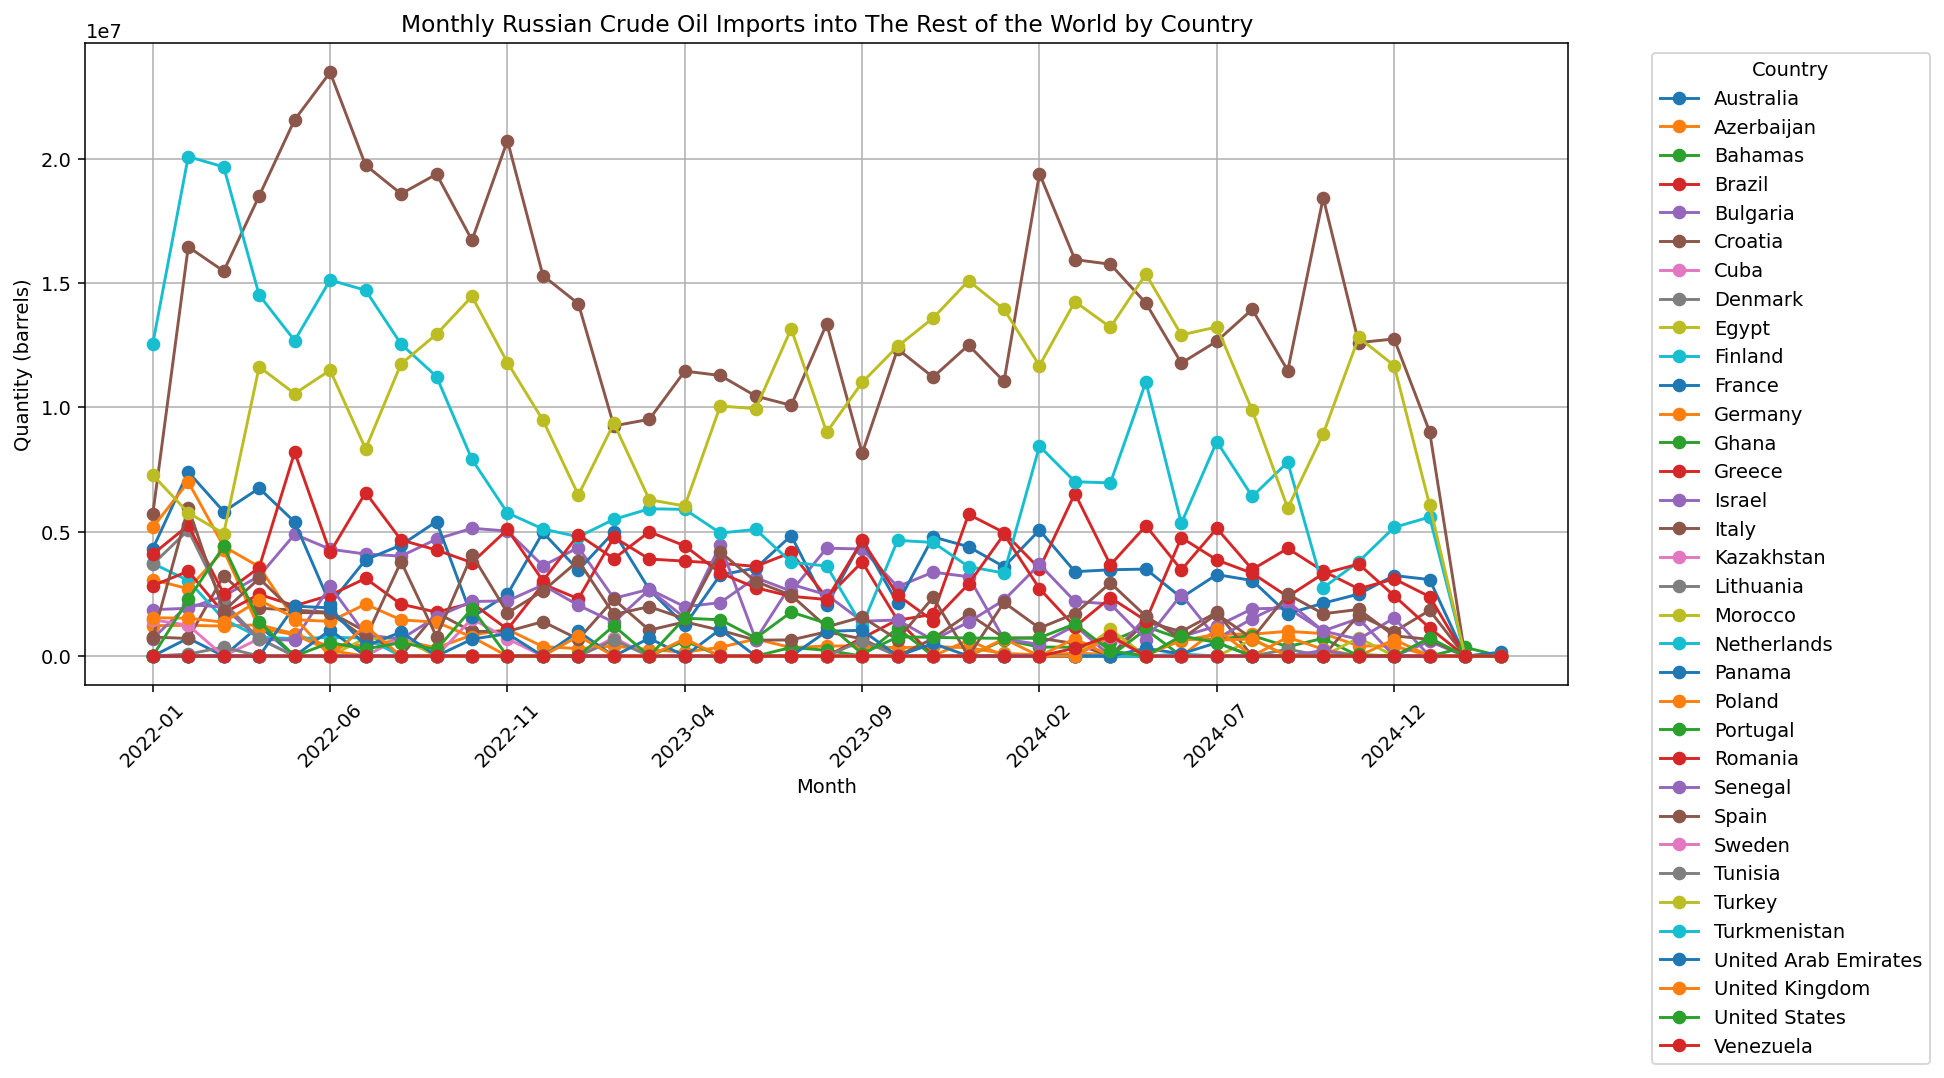

In [94]:
# Filter for Russian-origin crude oil
russian_crudes = ["Russia"]
asian_regions = ["Northeast Asia (NEA)", "Southeast Asia (SEA)", "India East Coast", "India West Coast"]

# Filter the dataframe
df_filtered = df[
    (df["ORIGIN COUNTRY"].isin(russian_crudes)) &
    (~df["DESTINATION TRADING REGION"].isin(asian_regions))
]

# Convert arrival date to datetime if not already
df_filtered["ARRIVAL DATE"] = pd.to_datetime(df_filtered["ARRIVAL DATE"], errors='coerce')

# Create a 'Month' column for grouping
df_filtered["Month"] = df_filtered["ARRIVAL DATE"].dt.to_period("M")

# Aggregate Russian crude oil imports into Asia by month (in barrels)
monthly_imports = df_filtered.groupby("Month")["QUANTITY (bbl)"].sum().reset_index()
monthly_imports["Month"] = monthly_imports["Month"].astype(str)

# Grouping by Month and Destination Country to get the total volume by country
monthly_country_imports = df_filtered.groupby(
    [df_filtered["ARRIVAL DATE"].dt.to_period("M").astype(str), "DESTINATION COUNTRY"]
)["QUANTITY (bbl)"].sum().reset_index()

# Rename 'ARRIVAL DATE' to 'Month' for clarity
monthly_country_imports.rename(columns={"ARRIVAL DATE": "Month"}, inplace=True)

# Pivot the data to prepare for charting
pivot_table = monthly_country_imports.pivot(index="Month", columns="DESTINATION COUNTRY", values="QUANTITY (bbl)").fillna(0)

# Plotting
plt.figure(figsize=(14, 7))
pivot_table.plot(kind="line", marker='o', figsize=(14, 7))
plt.title("Monthly Russian Crude Oil Imports into The Rest of the World by Country")
plt.xlabel("Month")
plt.ylabel("Quantity (barrels)")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# plt.text(-2,-13000000,f"""
# Top 3 non-asian partners:
# - Italy (Brown), 
# - Turkey (Yellowish-Green), 
# - Netherland (Light-Blue)""",
#         color='gray',fontfamily='monospace',fontsize=20)


plt.show()

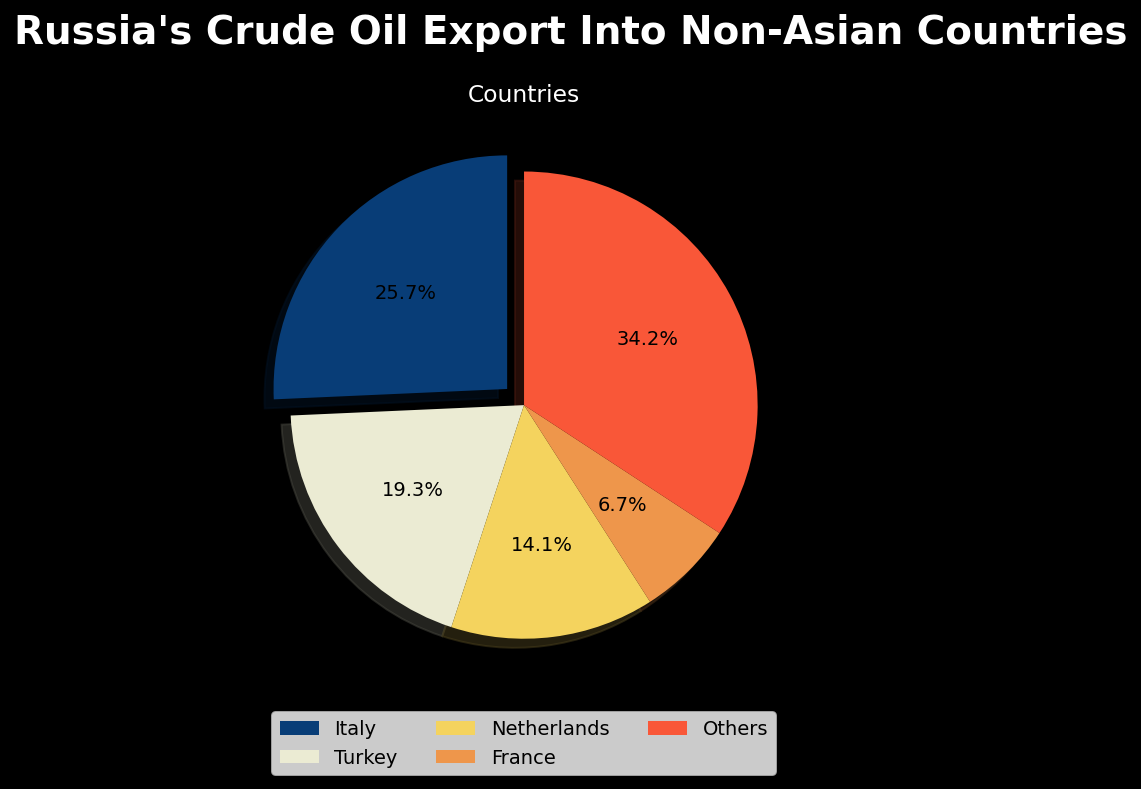

In [95]:
# Prepare data
df_rus = (pivot_table
          .sum()
          .sort_values(ascending=False)
          .reset_index(name="QUANTITY")
          .rename(columns={"DESTINATION COUNTRY": "COUNTRY"}))

# Aggregate lower-ranked regions into "Others"
others = {'COUNTRY': 'Others', 'QUANTITY': df_rus.loc[4:, 'QUANTITY'].sum()}
df_rus = pd.concat([df_rus.loc[:3, :], pd.DataFrame([others])], ignore_index=True)

# Create figure with one axis
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
fig.patch.set_facecolor('black')

# Plot pie chart
explode = (0.1, 0, 0, 0, 0)
labels = ["" for _ in df_rus["COUNTRY"]]
wedges, texts, autotexts = ax.pie(
    df_rus["QUANTITY"],
    labels=labels,
    autopct='%1.1f%%',
    colors=col,
    explode=explode,
    shadow=True,
    startangle=90,
    radius=1
)

ax.legend(wedges, df_rus["COUNTRY"], loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax.set_title("Countries", color='white')

# Add title and subtitle
ax.text(0.2, 1.55, "Russia's Crude Oil Export Into Non-Asian Countries",
        fontfamily='sans-serif', fontsize=20, fontweight='bold', color='white', ha='center')
# ax.text(0.02, 1.55, "Asian countries benefitted from the Russian invasion. ", 
#         fontfamily='monospace', fontsize=12, fontweight='light', color='white', ha='center')

plt.tight_layout()
plt.show()

### On European Countries

<Figure size 1960x980 with 0 Axes>

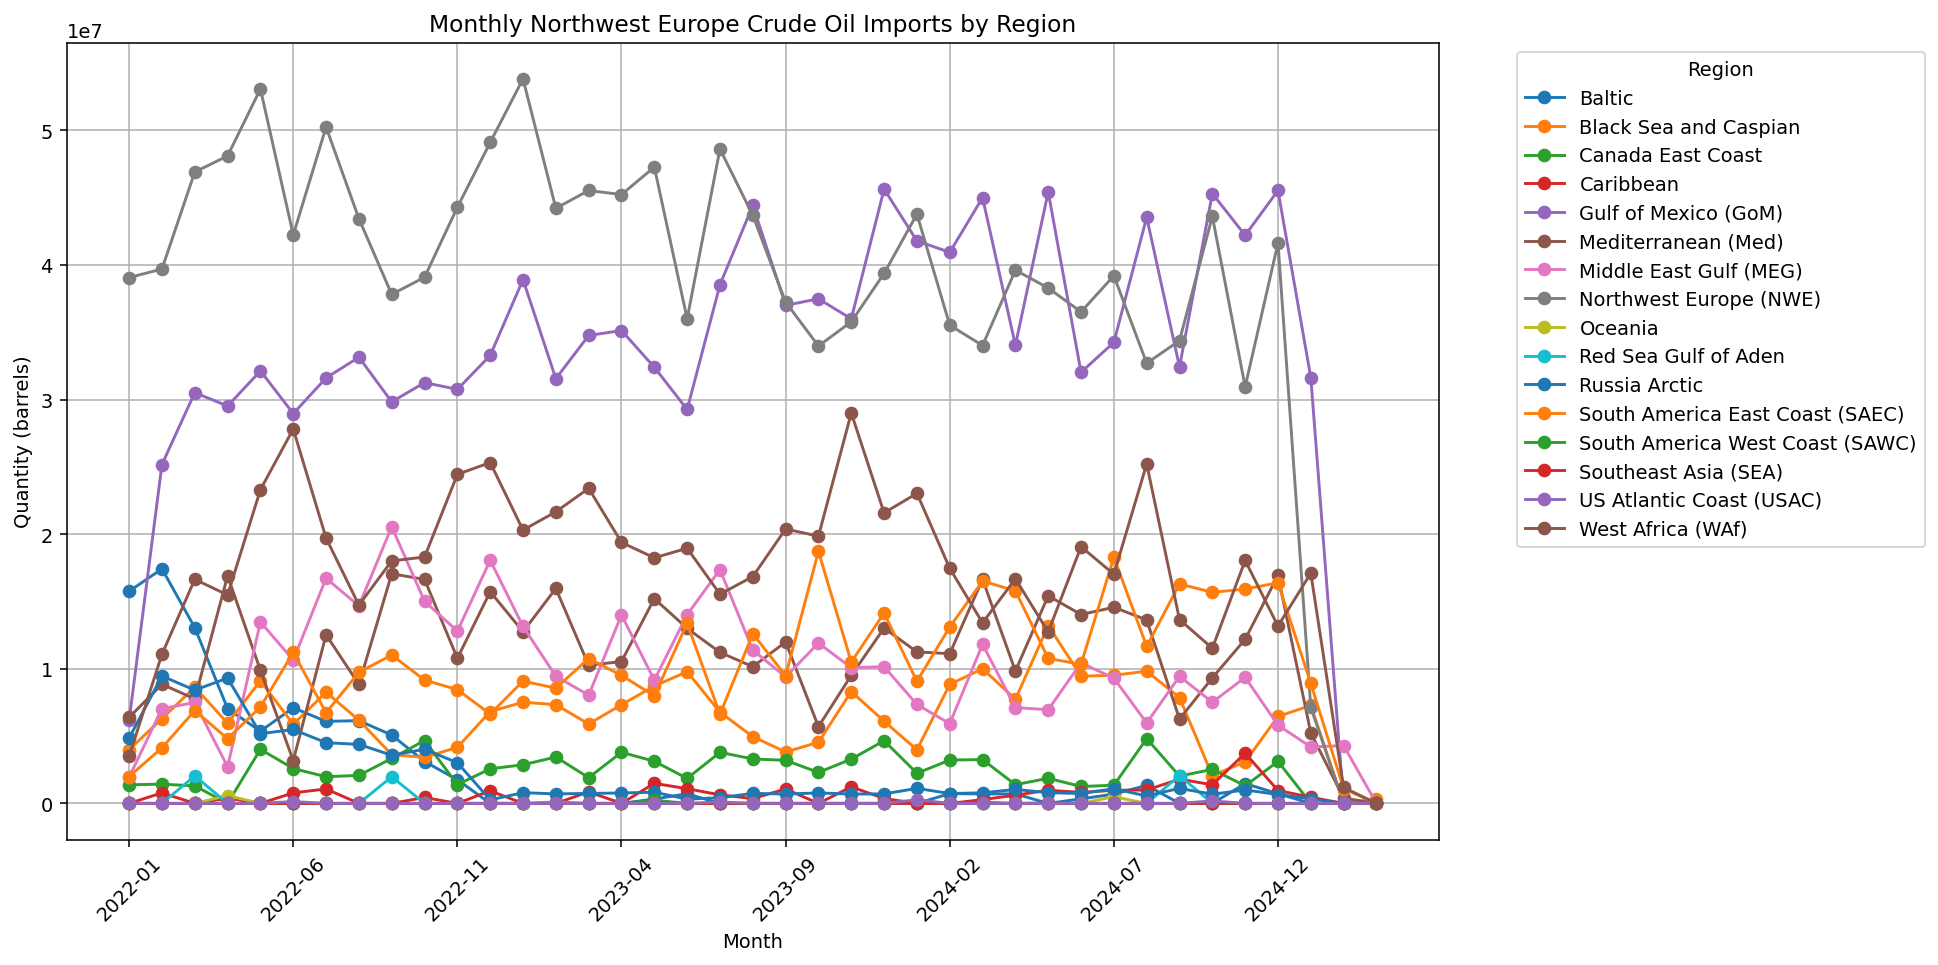

In [97]:
# Filter for top 3 exporter globally
df_NWE = df[df["DESTINATION TRADING REGION"] == "Northwest Europe (NWE)"].copy()
df_NWE["Month"] = df_NWE["ARRIVAL DATE"].dt.to_period("M").astype(str)

# Group by month and destination trading region
df_NWE = df_NWE.groupby(["Month", "ORIGIN TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()

# Pivot for plotting
pivot_NWE = df_NWE.pivot(index="Month", columns="ORIGIN TRADING REGION", values="QUANTITY (bbl)").fillna(0)

# display(df_NWE)

# Plot
plt.figure(figsize=(14, 7))
pivot_NWE.plot(kind="line", marker='o', figsize=(14, 7))
plt.title("Monthly Northwest Europe Crude Oil Imports by Region")
plt.xlabel("Month")
plt.ylabel("Quantity (barrels)")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

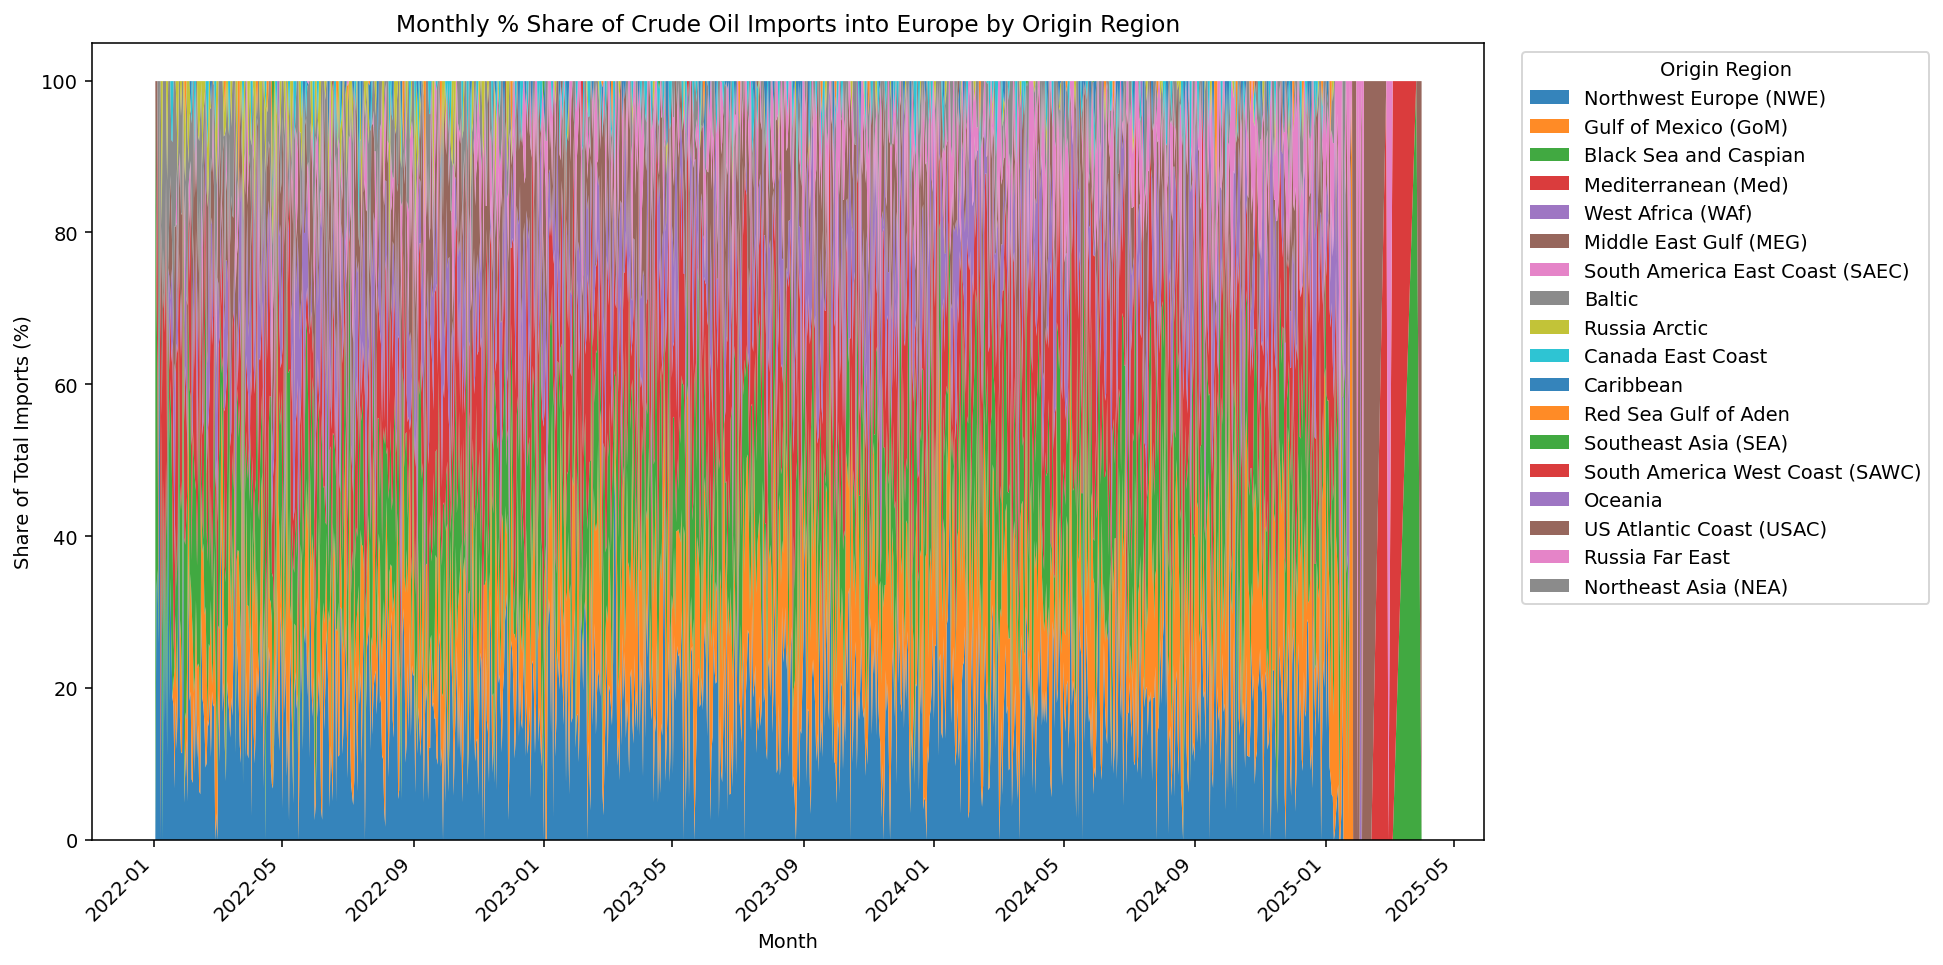

In [98]:
# Define European regions
european_regions = [
    "Mediterranean (Med)",
    "Northwest Europe (NWE)",
    "Baltic",
    "Black Sea and Caspian"
]

# Filter and prepare
df_europe = df[df["DESTINATION TRADING REGION"].isin(european_regions)].reset_index(drop=True)
df_europe.rename(columns={"ARRIVAL DATE": "Month"}, inplace=True)

# Group by month and origin region
europe_import = df_europe.groupby(["Month", "ORIGIN TRADING REGION"])["QUANTITY (bbl)"].sum().reset_index()

# Pivot to get time series matrix
pivot_europe = europe_import.pivot(index="Month", columns="ORIGIN TRADING REGION", values="QUANTITY (bbl)").fillna(0)

# Optionally filter top 10 contributors
top_regions = pivot_europe.sum().sort_values(ascending=False).index
pivot_top = pivot_europe[top_regions]

# Normalize to percentage share per month
pivot_percent = pivot_top.div(pivot_top.sum(axis=1), axis=0) * 100

# Plot normalized stacked area chart
ax = pivot_percent.plot.area(stacked=True, figsize=(14, 7), linewidth=0, alpha=0.9)

# Formatting
ax.set_title("Monthly % Share of Crude Oil Imports into Europe by Origin Region")
ax.set_xlabel("Month")
ax.set_ylabel("Share of Total Imports (%)")
ax.legend(title="Origin Region", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

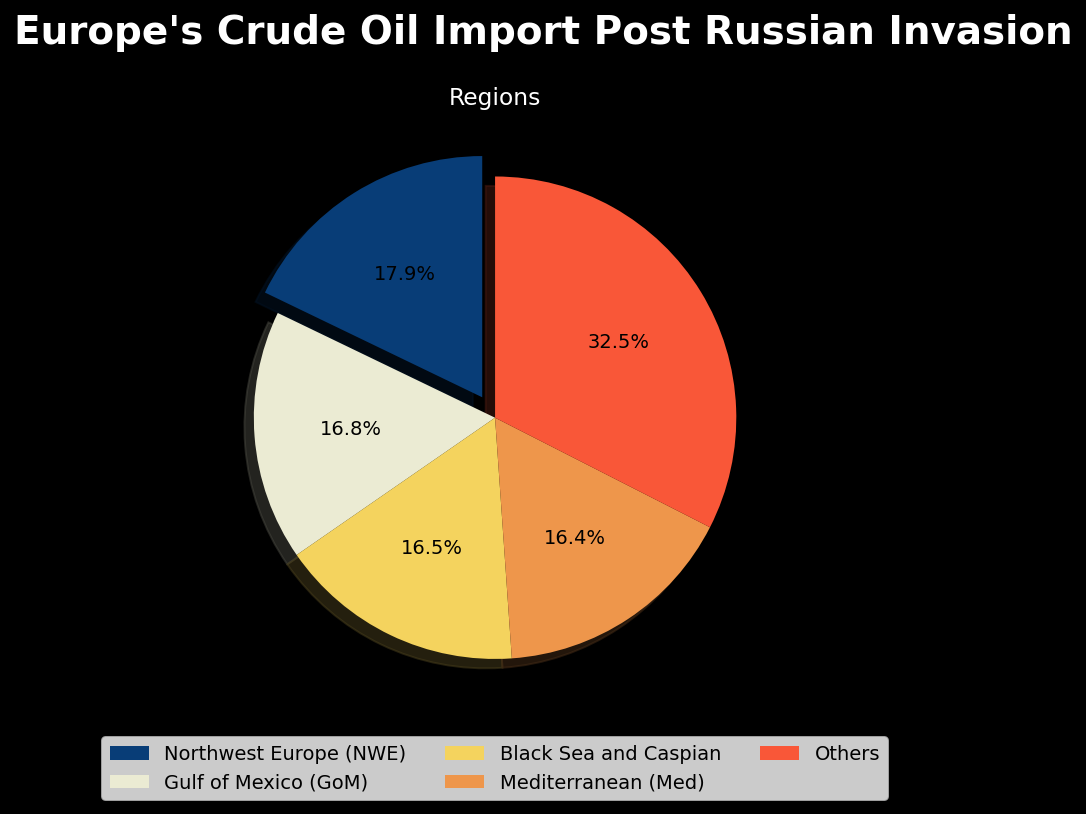

In [99]:
# Prepare data
df_rus = (pivot_top
          .sum()
          .sort_values(ascending=False)
          .reset_index(name="QUANTITY")
          .rename(columns={"ORIGIN TRADING REGION": "REGION"}))

# Aggregate lower-ranked regions into "Others"
others = {'REGION': 'Others', 'QUANTITY': df_rus.loc[4:, 'QUANTITY'].sum()}
df_rus = pd.concat([df_rus.loc[:3, :], pd.DataFrame([others])], ignore_index=True)

# Create figure with one axis
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
fig.patch.set_facecolor('black')

# Plot pie chart
explode = (0.1, 0, 0, 0, 0)
labels = ["" for _ in df_rus["REGION"]]
wedges, texts, autotexts = ax.pie(
    df_rus["QUANTITY"],
    labels=labels,
    autopct='%1.1f%%',
    colors=col,
    explode=explode,
    shadow=True,
    startangle=90,
    radius=1
)

ax.legend(wedges, df_rus["REGION"], loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax.set_title("Regions", color='white')

# Add title and subtitle
ax.text(0.2, 1.55, "Europe's Crude Oil Import Post Russian Invasion",
        fontfamily='sans-serif', fontsize=20, fontweight='bold', color='white', ha='center')
# ax.text(0.02, 1.55, "Asian countries benefitted from the Russian invasion. ", 
#         fontfamily='monospace', fontsize=12, fontweight='light', color='white', ha='center')

plt.tight_layout()
plt.show()

In [100]:
# Define European regions
european_regions = [
    "Mediterranean (Med)",
    "Northwest Europe (NWE)",
    "Baltic",
    "Black Sea and Caspian"
]

# ---------------------------------------------------------------------------------------------------------------------------------#

european_origin  = "Northwest Europe \(NWE\)"

# Filter and prepare
df_europe = df[df["DESTINATION TRADING REGION"].isin(european_regions)].reset_index(drop=True)
df_europe.rename(columns={"ARRIVAL DATE": "Month"}, inplace=True)
df_europe["COUNTRY"] = df_europe["ORIGIN TRADING REGION"] + " - " + df_europe["ORIGIN COUNTRY"]

# Group by month and origin region
europe_import = df_europe.groupby(["Month", "COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()
europe_import = europe_import[europe_import["COUNTRY"].str.contains(european_origin, na=False)]

# Pivot to get time series matrix
pivot_europe = europe_import.pivot(index="Month", columns="COUNTRY", values="QUANTITY (bbl)").fillna(0)

# Optionally filter top 10 contributors
top_regions = pivot_europe.sum().sort_values(ascending=False).index
pivot_top = pivot_europe[top_regions]

# Prepare data
df_nwe = (pivot_top
          .sum()
          .sort_values(ascending=False)
          .reset_index(name="QUANTITY")
          .rename(columns={"ORIGIN TRADING REGION": "REGION"}))

# Aggregate lower-ranked regions into "Others"
others = {'COUNTRY': 'Others', 'QUANTITY': df_nwe.loc[4:, 'QUANTITY'].sum()}
df_nwe = pd.concat([df_nwe.loc[:3, :], pd.DataFrame([others])], ignore_index=True)

# display(df_nwe)

# ---------------------------------------------------------------------------------------------------------------------------------#

european_origin  = "Gulf of Mexico \(GoM\)"

# Filter and prepare
df_europe = df[df["DESTINATION TRADING REGION"].isin(european_regions)].reset_index(drop=True)
df_europe.rename(columns={"ARRIVAL DATE": "Month"}, inplace=True)
df_europe["COUNTRY"] = df_europe["ORIGIN TRADING REGION"] + " - " + df_europe["ORIGIN COUNTRY"]

# Group by month and origin region
europe_import = df_europe.groupby(["Month", "COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()
europe_import = europe_import[europe_import["COUNTRY"].str.contains(european_origin, na=False)]

# Pivot to get time series matrix
pivot_europe = europe_import.pivot(index="Month", columns="COUNTRY", values="QUANTITY (bbl)").fillna(0)

# Optionally filter top 10 contributors
top_regions = pivot_europe.sum().sort_values(ascending=False).index
pivot_top = pivot_europe[top_regions]

# Prepare data
df_gom = (pivot_top
          .sum()
          .sort_values(ascending=False)
          .reset_index(name="QUANTITY")
          .rename(columns={"ORIGIN TRADING REGION": "REGION"}))

# display(df_gom)

# ---------------------------------------------------------------------------------------------------------------------------------#

european_origin  = "Black Sea and Caspian"

# Filter and prepare
df_europe = df[df["DESTINATION TRADING REGION"].isin(european_regions)].reset_index(drop=True)
df_europe.rename(columns={"ARRIVAL DATE": "Month"}, inplace=True)
df_europe["COUNTRY"] = df_europe["ORIGIN TRADING REGION"] + " - " + df_europe["ORIGIN COUNTRY"]

# Group by month and origin region
europe_import = df_europe.groupby(["Month", "COUNTRY"])["QUANTITY (bbl)"].sum().reset_index()
europe_import = europe_import[europe_import["COUNTRY"].str.contains(european_origin, na=False)]

# Pivot to get time series matrix
pivot_europe = europe_import.pivot(index="Month", columns="COUNTRY", values="QUANTITY (bbl)").fillna(0)

# Optionally filter top 10 contributors
top_regions = pivot_europe.sum().sort_values(ascending=False).index
pivot_top = pivot_europe[top_regions]

# Prepare data
df_bsc = (pivot_top
          .sum()
          .sort_values(ascending=False)
          .reset_index(name="QUANTITY")
          .rename(columns={"ORIGIN TRADING REGION": "REGION"}))

# Aggregate lower-ranked regions into "Others"
others = {'COUNTRY': 'Others', 'QUANTITY': df_bsc.loc[4:, 'QUANTITY'].sum()}
df_bsc = pd.concat([df_bsc.loc[:3, :], pd.DataFrame([others])], ignore_index=True)

# display(df_bsc)

# ---------------------------------------------------------------------------------------------------------------------------------#

# # Create figure with one axis
# fig, ax = plt.subplots(1, 1, figsize=(7, 6))
# fig.patch.set_facecolor('black')

# # Plot pie chart
# explode = (0.1, 0, 0, 0, 0)
# labels = ["" for _ in df_rus["COUNTRY"]]
# wedges, texts, autotexts = ax.pie(
#     df_rus["QUANTITY"],
#     labels=labels,
#     autopct='%1.1f%%',
#     colors=col,
#     explode=explode,
#     shadow=True,
#     startangle=90,
#     radius=1
# )

# ax.legend(wedges, df_rus["COUNTRY"], loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=1)
# ax.set_title("Region - Country", color='white')

# # Add title and subtitle
# ax.text(0.2, 1.55, "Northwest Europe (NWE)",
#         fontfamily='sans-serif', fontsize=20, fontweight='bold', color='white', ha='center')
# plt.tight_layout()
# plt.show()

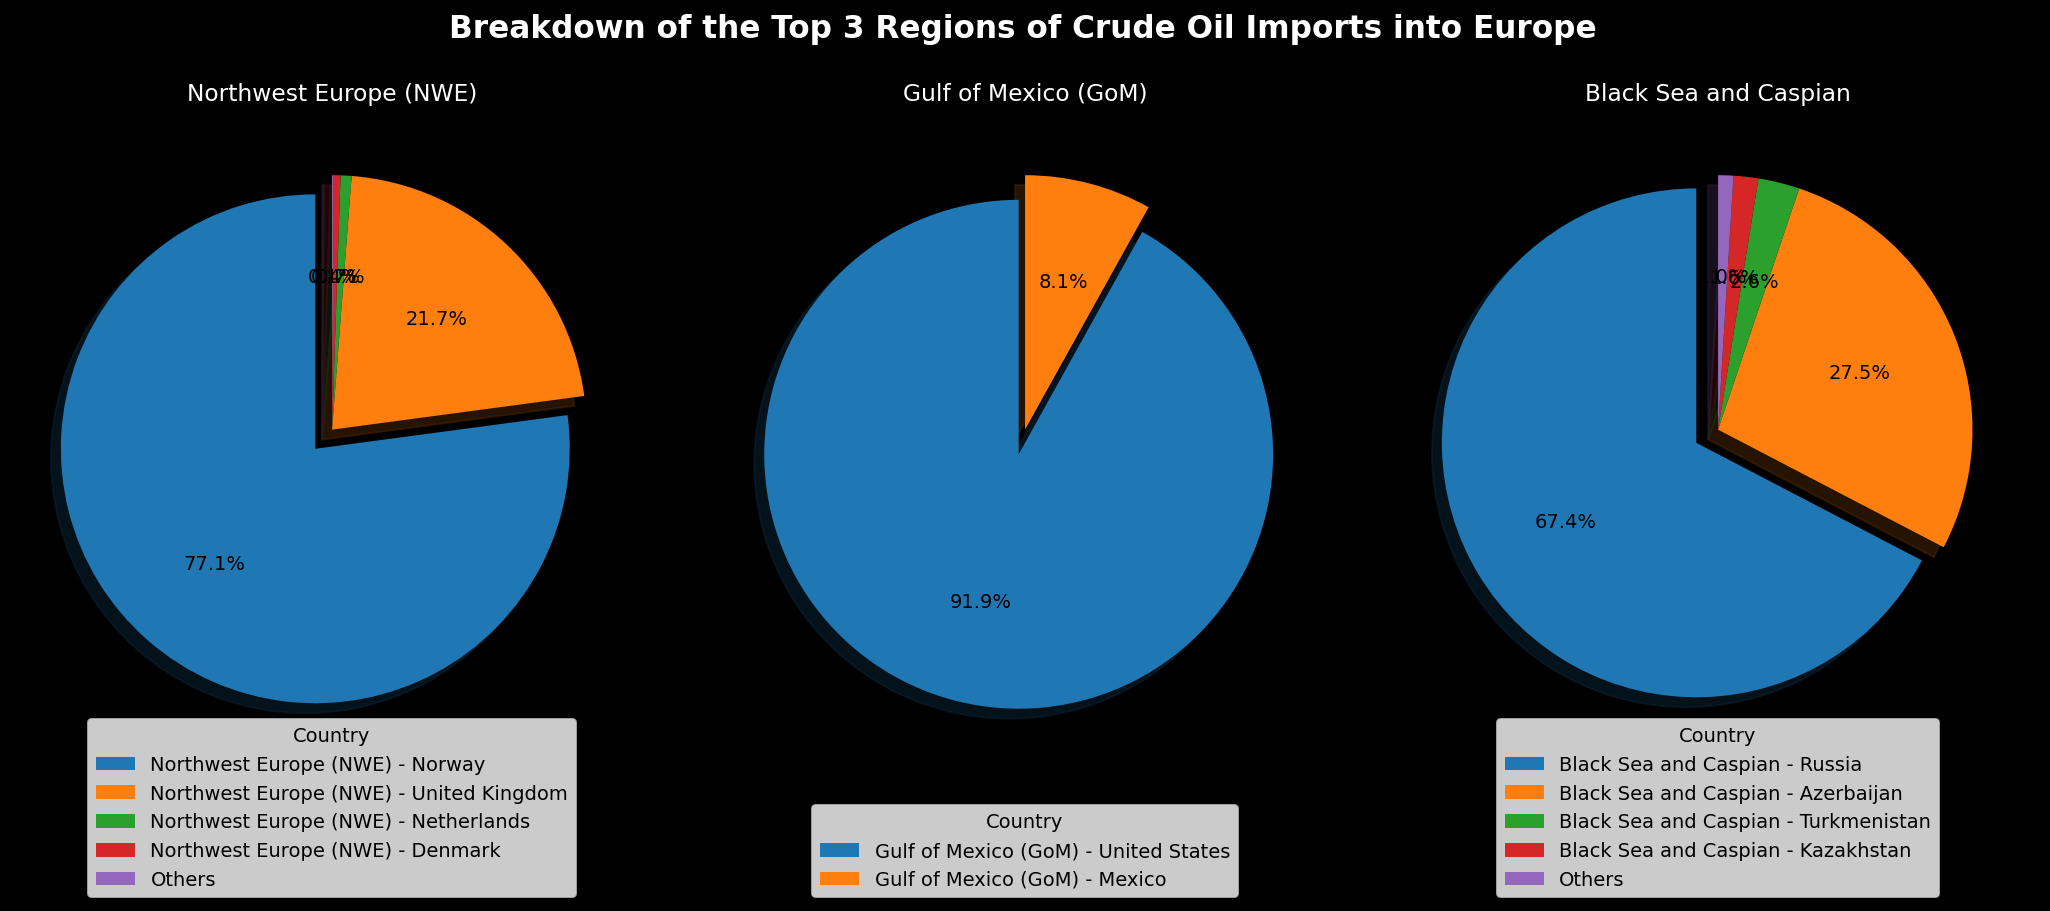

In [101]:
# Set up figure and axes
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.patch.set_facecolor('black')  # Set background if needed

# Pie chart setup
explode = (0.1, 0, 0, 0, 0)  # Emphasize the largest slice
datasets = [
    (df_nwe, "Northwest Europe (NWE)"),
    (df_gom, "Gulf of Mexico (GoM)"),
    (df_bsc, "Black Sea and Caspian")
]

# Loop through and plot
for i, (df_, title) in enumerate(datasets):
    labels = df_["COUNTRY"]
    sizes = df_["QUANTITY"]
    explode_adj = explode[:len(labels)]  # Adjust explode if <5 items

    wedges, texts, autotexts = ax[i].pie(
        sizes,
        labels=None,  # hide inline labels
        autopct='%1.1f%%',
        explode=explode_adj,
        # colors=col,
        shadow=True,
        startangle=90
    )

    ax[i].legend(wedges, labels, title="Country", loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=1)
    ax[i].set_title(title, color='white')

# Layout adjustments
plt.suptitle("Breakdown of the Top 3 Regions of Crude Oil Imports into Europe", fontsize=16, fontweight='bold', color='white')
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # leave space for suptitle
plt.show()